# Pipeline Post Processing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from statannot import add_stat_annotation

In [3]:
metadata = pd.read_csv('../adaptation_pilot_metadata.txt', sep='\t', index_col=0)
metadata.head()

,box_id,cage_id,collection_timepoint,collection_timestamp,date_colonized,diet,elevation,elevation_units,empo_1,empo_2,...,mouse_dob,mouse_id,mouse_strain,qiita_study_id,sample_type,scientific_name,sex,taxon_id,tube_id,zarrinparlab_quant_ng_ul
sample_name,,,,,,,,,,,,,,,,,,,,,
12986.23B.Day7.1,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193,meters,Host-associated,Animal,...,5/2/17 0:00,23B,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,23B-1_Day7,78.0
12986.23B.Day7.10,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193,meters,Host-associated,Animal,...,5/2/17 0:00,23B,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,23B-10_Day7,53.3
12986.23B.Day7.11,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193,meters,Host-associated,Animal,...,5/2/17 0:00,23B,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,23B-11_Day7,80.6
12986.23B.Day7.12,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193,meters,Host-associated,Animal,...,5/2/17 0:00,23B,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,23B-12_Day7,49.1
12986.23B.Day7.13,14.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193,meters,Host-associated,Animal,...,5/2/17 0:00,23B,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,23B-13_Day7,48.6


In [4]:
metadata['dramv_id'] = metadata['mouse_id'].astype(str)+"_"+ metadata['collection_timepoint'].astype(str)+"_"+ metadata['isolate_number'].astype(str)

In [5]:
metadata.head()

,box_id,cage_id,collection_timepoint,collection_timestamp,date_colonized,diet,elevation,elevation_units,empo_1,empo_2,...,mouse_id,mouse_strain,qiita_study_id,sample_type,scientific_name,sex,taxon_id,tube_id,zarrinparlab_quant_ng_ul,dramv_id
sample_name,,,,,,,,,,,,,,,,,,,,,
12986.23B.Day7.1,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193,meters,Host-associated,Animal,...,23B,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,23B-1_Day7,78.0,23B_Day7_1
12986.23B.Day7.10,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193,meters,Host-associated,Animal,...,23B,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,23B-10_Day7,53.3,23B_Day7_10
12986.23B.Day7.11,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193,meters,Host-associated,Animal,...,23B,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,23B-11_Day7,80.6,23B_Day7_11
12986.23B.Day7.12,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193,meters,Host-associated,Animal,...,23B,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,23B-12_Day7,49.1,23B_Day7_12
12986.23B.Day7.13,14.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193,meters,Host-associated,Animal,...,23B,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,23B-13_Day7,48.6,23B_Day7_13


### Annotations

In [6]:
path = r'./*/dramv-annotate/'
all_files = glob.glob(path + "annotations.tsv")

In [7]:
li = []

In [8]:
for filename in all_files:
    dramv = pd.read_csv(filename, sep='\t', header=0)
    dramv["identification"] = filename
    li.append(dramv)

In [9]:
combo = pd.concat(li, axis=0, ignore_index=True, sort=False)
combo.shape

(159337, 34)

In [10]:
combo.head()

,Unnamed: 0,fasta,scaffold,gene_position,start_position,end_position,strandedness,rank,kegg_id,kegg_hit,...,cazy_hits,vogdb_description,vogdb_categories,heme_regulatory_motif_count,virsorter_category,auxiliary_score,is_transposon,amg_flags,identification,vogdb_hits
0,2__0_partial_1-cat_1_1,2__0_partial_1-cat_1,2__0_partial_1-cat_1,1,602,991,-1,D,NaN,NaN,...,NaN,sp|P0AG11|UMUD_ECOLI Protein UmuD; Xh,Xh,0,1.0,5,False,PF,./27N_Day7_9_S989_L001_noref/dramv-annotate/an...,NaN
1,2__0_partial_1-cat_1_2,2__0_partial_1-cat_1,2__0_partial_1-cat_1,2,1070,1312,1,D,NaN,NaN,...,NaN,sp|P41063|TUM_BP186 SOS operon TUM protein; Xu,Xu,0,1.0,2,False,F,./27N_Day7_9_S989_L001_noref/dramv-annotate/an...,NaN
2,2__0_partial_1-cat_1_3,2__0_partial_1-cat_1,2__0_partial_1-cat_1,3,1730,2173,1,D,NaN,NaN,...,NaN,sp|Q9T1U9|U1_BPMU Tail fiber assembly protein ...,Xp;Xs;Xh,0,2.0,2,False,VF,./27N_Day7_9_S989_L001_noref/dramv-annotate/an...,NaN
3,2__0_partial_1-cat_1_4,2__0_partial_1-cat_1,2__0_partial_1-cat_1,4,2145,2738,-1,D,NaN,NaN,...,NaN,sp|P03740|TFA_LAMBD Tail fiber assembly protei...,Xs,0,0.0,2,False,VF,./27N_Day7_9_S989_L001_noref/dramv-annotate/an...,NaN
4,2__0_partial_1-cat_1_5,2__0_partial_1-cat_1,2__0_partial_1-cat_1,5,2738,3670,-1,E,NaN,NaN,...,NaN,REFSEQ putative tail protein; Xu,Xu,0,0.0,1,False,F,./27N_Day7_9_S989_L001_noref/dramv-annotate/an...,NaN


In [11]:
combo["sample"] = combo["identification"].str.split("/").str[1]
combo.head()

,Unnamed: 0,fasta,scaffold,gene_position,start_position,end_position,strandedness,rank,kegg_id,kegg_hit,...,vogdb_description,vogdb_categories,heme_regulatory_motif_count,virsorter_category,auxiliary_score,is_transposon,amg_flags,identification,vogdb_hits,sample
0,2__0_partial_1-cat_1_1,2__0_partial_1-cat_1,2__0_partial_1-cat_1,1,602,991,-1,D,NaN,NaN,...,sp|P0AG11|UMUD_ECOLI Protein UmuD; Xh,Xh,0,1.0,5,False,PF,./27N_Day7_9_S989_L001_noref/dramv-annotate/an...,NaN,27N_Day7_9_S989_L001_noref
1,2__0_partial_1-cat_1_2,2__0_partial_1-cat_1,2__0_partial_1-cat_1,2,1070,1312,1,D,NaN,NaN,...,sp|P41063|TUM_BP186 SOS operon TUM protein; Xu,Xu,0,1.0,2,False,F,./27N_Day7_9_S989_L001_noref/dramv-annotate/an...,NaN,27N_Day7_9_S989_L001_noref
2,2__0_partial_1-cat_1_3,2__0_partial_1-cat_1,2__0_partial_1-cat_1,3,1730,2173,1,D,NaN,NaN,...,sp|Q9T1U9|U1_BPMU Tail fiber assembly protein ...,Xp;Xs;Xh,0,2.0,2,False,VF,./27N_Day7_9_S989_L001_noref/dramv-annotate/an...,NaN,27N_Day7_9_S989_L001_noref
3,2__0_partial_1-cat_1_4,2__0_partial_1-cat_1,2__0_partial_1-cat_1,4,2145,2738,-1,D,NaN,NaN,...,sp|P03740|TFA_LAMBD Tail fiber assembly protei...,Xs,0,0.0,2,False,VF,./27N_Day7_9_S989_L001_noref/dramv-annotate/an...,NaN,27N_Day7_9_S989_L001_noref
4,2__0_partial_1-cat_1_5,2__0_partial_1-cat_1,2__0_partial_1-cat_1,5,2738,3670,-1,E,NaN,NaN,...,REFSEQ putative tail protein; Xu,Xu,0,0.0,1,False,F,./27N_Day7_9_S989_L001_noref/dramv-annotate/an...,NaN,27N_Day7_9_S989_L001_noref


In [12]:
new = combo["sample"].str.split("_", n=3, expand=True)
new['id'] = new[0].astype(str)+"_"+new[1].astype(str)+"_"+new[2].astype(str)
new.head()

,0,1,2,3,id
0,27N,Day7,9,S989_L001_noref,27N_Day7_9
1,27N,Day7,9,S989_L001_noref,27N_Day7_9
2,27N,Day7,9,S989_L001_noref,27N_Day7_9
3,27N,Day7,9,S989_L001_noref,27N_Day7_9
4,27N,Day7,9,S989_L001_noref,27N_Day7_9


In [13]:
combo['simple_id'] = new['id']

In [14]:
allinfo = pd.merge(combo, metadata, left_on='simple_id', right_on='dramv_id')
allinfo.head()

,Unnamed: 0,fasta,scaffold,gene_position,start_position,end_position,strandedness,rank,kegg_id,kegg_hit,...,mouse_id,mouse_strain,qiita_study_id,sample_type,scientific_name,sex,taxon_id,tube_id,zarrinparlab_quant_ng_ul,dramv_id
0,2__0_partial_1-cat_1_1,2__0_partial_1-cat_1,2__0_partial_1-cat_1,1,602,991,-1,D,NaN,NaN,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,27N_Day7_9
1,2__0_partial_1-cat_1_2,2__0_partial_1-cat_1,2__0_partial_1-cat_1,2,1070,1312,1,D,NaN,NaN,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,27N_Day7_9
2,2__0_partial_1-cat_1_3,2__0_partial_1-cat_1,2__0_partial_1-cat_1,3,1730,2173,1,D,NaN,NaN,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,27N_Day7_9
3,2__0_partial_1-cat_1_4,2__0_partial_1-cat_1,2__0_partial_1-cat_1,4,2145,2738,-1,D,NaN,NaN,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,27N_Day7_9
4,2__0_partial_1-cat_1_5,2__0_partial_1-cat_1,2__0_partial_1-cat_1,5,2738,3670,-1,E,NaN,NaN,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,27N_Day7_9


In [15]:
allinfo.set_index("sample", inplace=True)
allinfo.head()

,Unnamed: 0,fasta,scaffold,gene_position,start_position,end_position,strandedness,rank,kegg_id,kegg_hit,...,mouse_id,mouse_strain,qiita_study_id,sample_type,scientific_name,sex,taxon_id,tube_id,zarrinparlab_quant_ng_ul,dramv_id
sample,,,,,,,,,,,,,,,,,,,,,
27N_Day7_9_S989_L001_noref,2__0_partial_1-cat_1_1,2__0_partial_1-cat_1,2__0_partial_1-cat_1,1,602,991,-1,D,NaN,NaN,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,27N_Day7_9
27N_Day7_9_S989_L001_noref,2__0_partial_1-cat_1_2,2__0_partial_1-cat_1,2__0_partial_1-cat_1,2,1070,1312,1,D,NaN,NaN,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,27N_Day7_9
27N_Day7_9_S989_L001_noref,2__0_partial_1-cat_1_3,2__0_partial_1-cat_1,2__0_partial_1-cat_1,3,1730,2173,1,D,NaN,NaN,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,27N_Day7_9
27N_Day7_9_S989_L001_noref,2__0_partial_1-cat_1_4,2__0_partial_1-cat_1,2__0_partial_1-cat_1,4,2145,2738,-1,D,NaN,NaN,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,27N_Day7_9
27N_Day7_9_S989_L001_noref,2__0_partial_1-cat_1_5,2__0_partial_1-cat_1,2__0_partial_1-cat_1,5,2738,3670,-1,E,NaN,NaN,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,27N_Day7_9


In [16]:
allinfo.rename(columns={"Unnamed: 0": "phage_id"}, inplace=True)
allinfo.head()

,phage_id,fasta,scaffold,gene_position,start_position,end_position,strandedness,rank,kegg_id,kegg_hit,...,mouse_id,mouse_strain,qiita_study_id,sample_type,scientific_name,sex,taxon_id,tube_id,zarrinparlab_quant_ng_ul,dramv_id
sample,,,,,,,,,,,,,,,,,,,,,
27N_Day7_9_S989_L001_noref,2__0_partial_1-cat_1_1,2__0_partial_1-cat_1,2__0_partial_1-cat_1,1,602,991,-1,D,NaN,NaN,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,27N_Day7_9
27N_Day7_9_S989_L001_noref,2__0_partial_1-cat_1_2,2__0_partial_1-cat_1,2__0_partial_1-cat_1,2,1070,1312,1,D,NaN,NaN,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,27N_Day7_9
27N_Day7_9_S989_L001_noref,2__0_partial_1-cat_1_3,2__0_partial_1-cat_1,2__0_partial_1-cat_1,3,1730,2173,1,D,NaN,NaN,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,27N_Day7_9
27N_Day7_9_S989_L001_noref,2__0_partial_1-cat_1_4,2__0_partial_1-cat_1,2__0_partial_1-cat_1,4,2145,2738,-1,D,NaN,NaN,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,27N_Day7_9
27N_Day7_9_S989_L001_noref,2__0_partial_1-cat_1_5,2__0_partial_1-cat_1,2__0_partial_1-cat_1,5,2738,3670,-1,E,NaN,NaN,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,27N_Day7_9


In [17]:
allinfo.to_csv("./dramv_phage_with_metadata.csv")

#### graphs

In [18]:
phage_info = allinfo[["viral_id", "viral_hit", "dramv_id"]].copy()
phage_info.head()

,viral_id,viral_hit,dramv_id
sample,,,
27N_Day7_9_S989_L001_noref,YP_009914581.1,YP_009914581.1 HumD [Enterobacteria phage P7],27N_Day7_9
27N_Day7_9_S989_L001_noref,YP_006602.1,YP_006602.1 Gp22 [Klebsiella phage phiKO2],27N_Day7_9
27N_Day7_9_S989_L001_noref,YP_009211929.1,YP_009211929.1 tail fiber assembly protein [Es...,27N_Day7_9
27N_Day7_9_S989_L001_noref,YP_009949279.1,YP_009949279.1 tail fiber assembly protein [Es...,27N_Day7_9
27N_Day7_9_S989_L001_noref,YP_007112365.1,YP_007112365.1 tail fiber [Enterobacterial pha...,27N_Day7_9


In [19]:
nonans_phage_info = phage_info.dropna().copy()
print(phage_info.shape)
print(nonans_phage_info.shape)

(167464, 3)
(132170, 3)


In [20]:
nonans_phage_info['gene'] = nonans_phage_info["viral_hit"].str.split("[").str[0]
nonans_phage_info['phage'] = nonans_phage_info["viral_hit"].str.split("[").str[1]

In [21]:
nonans_phage_info['phage'] = nonans_phage_info['phage'].str.rstrip(']')

In [22]:
nonans_phage_info['gene'] = nonans_phage_info['gene'].str.split(" ", n=1).str[1]

In [23]:
nonans_phage_info.head()

,viral_id,viral_hit,dramv_id,gene,phage
sample,,,,,
27N_Day7_9_S989_L001_noref,YP_009914581.1,YP_009914581.1 HumD [Enterobacteria phage P7],27N_Day7_9,HumD,Enterobacteria phage P7
27N_Day7_9_S989_L001_noref,YP_006602.1,YP_006602.1 Gp22 [Klebsiella phage phiKO2],27N_Day7_9,Gp22,Klebsiella phage phiKO2
27N_Day7_9_S989_L001_noref,YP_009211929.1,YP_009211929.1 tail fiber assembly protein [Es...,27N_Day7_9,tail fiber assembly protein,Escherichia phage pro483
27N_Day7_9_S989_L001_noref,YP_009949279.1,YP_009949279.1 tail fiber assembly protein [Es...,27N_Day7_9,tail fiber assembly protein,Escherichia phage 500465-2
27N_Day7_9_S989_L001_noref,YP_007112365.1,YP_007112365.1 tail fiber [Enterobacterial pha...,27N_Day7_9,tail fiber,Enterobacterial phage mEp213


In [24]:
nonans_phage_info['taxonomy'] = nonans_phage_info['phage'].str.split("phage|virus", n=1).str[0]
nonans_phage_info['phage_id'] = nonans_phage_info['phage'].str.split("phage|virus", n=1).str[1]

In [25]:
nonans_phage_info.head()

,viral_id,viral_hit,dramv_id,gene,phage,taxonomy,phage_id
sample,,,,,,,
27N_Day7_9_S989_L001_noref,YP_009914581.1,YP_009914581.1 HumD [Enterobacteria phage P7],27N_Day7_9,HumD,Enterobacteria phage P7,Enterobacteria,P7
27N_Day7_9_S989_L001_noref,YP_006602.1,YP_006602.1 Gp22 [Klebsiella phage phiKO2],27N_Day7_9,Gp22,Klebsiella phage phiKO2,Klebsiella,phiKO2
27N_Day7_9_S989_L001_noref,YP_009211929.1,YP_009211929.1 tail fiber assembly protein [Es...,27N_Day7_9,tail fiber assembly protein,Escherichia phage pro483,Escherichia,pro483
27N_Day7_9_S989_L001_noref,YP_009949279.1,YP_009949279.1 tail fiber assembly protein [Es...,27N_Day7_9,tail fiber assembly protein,Escherichia phage 500465-2,Escherichia,500465-2
27N_Day7_9_S989_L001_noref,YP_007112365.1,YP_007112365.1 tail fiber [Enterobacterial pha...,27N_Day7_9,tail fiber,Enterobacterial phage mEp213,Enterobacterial,mEp213


In [26]:
phage_combo = pd.merge(nonans_phage_info, metadata, left_on='dramv_id', right_on='dramv_id')
phage_combo.head()

,viral_id,viral_hit,dramv_id,gene,phage,taxonomy,phage_id,box_id,cage_id,collection_timepoint,...,mouse_dob,mouse_id,mouse_strain,qiita_study_id,sample_type,scientific_name,sex,taxon_id,tube_id,zarrinparlab_quant_ng_ul
0,YP_009914581.1,YP_009914581.1 HumD [Enterobacteria phage P7],27N_Day7_9,HumD,Enterobacteria phage P7,Enterobacteria,P7,11.0,27.0,Day7,...,5/2/17 0:00,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7
1,YP_006602.1,YP_006602.1 Gp22 [Klebsiella phage phiKO2],27N_Day7_9,Gp22,Klebsiella phage phiKO2,Klebsiella,phiKO2,11.0,27.0,Day7,...,5/2/17 0:00,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7
2,YP_009211929.1,YP_009211929.1 tail fiber assembly protein [Es...,27N_Day7_9,tail fiber assembly protein,Escherichia phage pro483,Escherichia,pro483,11.0,27.0,Day7,...,5/2/17 0:00,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7
3,YP_009949279.1,YP_009949279.1 tail fiber assembly protein [Es...,27N_Day7_9,tail fiber assembly protein,Escherichia phage 500465-2,Escherichia,500465-2,11.0,27.0,Day7,...,5/2/17 0:00,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7
4,YP_007112365.1,YP_007112365.1 tail fiber [Enterobacterial pha...,27N_Day7_9,tail fiber,Enterobacterial phage mEp213,Enterobacterial,mEp213,11.0,27.0,Day7,...,5/2/17 0:00,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7


In [27]:
class dict_partial(dict):
    def __getitem__(self, value):
        for k in self.keys():
            if k in value:
                return self.get(k)
        else:
            return self.get(None)

In [28]:
taxa_map = dict_partial({'Enterobact':'Enterobacteriaceae', 'Escherichia':'Escherichia',
                            'Lactobacillus': 'Lactobacillus', 'Stx2': 'Escherichia', 
                        'Canid alphaherpesvirus 1':'Canid alphaherpesvirus 1', 
                       'Megavirus chiliensis':'Megavirus chiliensis',
                        'Phage Gifsy-1':'Salmonella '})
phage_combo['group'] = phage_combo['phage'].apply(lambda x: taxa_map[x])

In [29]:
phage_combo['group'] = [x.replace('None', y) for x, y in zip(phage_combo.group.astype(str), phage_combo.taxonomy)]

In [30]:
phage_combo.head()

,viral_id,viral_hit,dramv_id,gene,phage,taxonomy,phage_id,box_id,cage_id,collection_timepoint,...,mouse_id,mouse_strain,qiita_study_id,sample_type,scientific_name,sex,taxon_id,tube_id,zarrinparlab_quant_ng_ul,group
0,YP_009914581.1,YP_009914581.1 HumD [Enterobacteria phage P7],27N_Day7_9,HumD,Enterobacteria phage P7,Enterobacteria,P7,11.0,27.0,Day7,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Enterobacteriaceae
1,YP_006602.1,YP_006602.1 Gp22 [Klebsiella phage phiKO2],27N_Day7_9,Gp22,Klebsiella phage phiKO2,Klebsiella,phiKO2,11.0,27.0,Day7,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Klebsiella
2,YP_009211929.1,YP_009211929.1 tail fiber assembly protein [Es...,27N_Day7_9,tail fiber assembly protein,Escherichia phage pro483,Escherichia,pro483,11.0,27.0,Day7,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Escherichia
3,YP_009949279.1,YP_009949279.1 tail fiber assembly protein [Es...,27N_Day7_9,tail fiber assembly protein,Escherichia phage 500465-2,Escherichia,500465-2,11.0,27.0,Day7,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Escherichia
4,YP_007112365.1,YP_007112365.1 tail fiber [Enterobacterial pha...,27N_Day7_9,tail fiber,Enterobacterial phage mEp213,Enterobacterial,mEp213,11.0,27.0,Day7,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Enterobacteriaceae


In [31]:
phage_combo.columns

Index(['viral_id', 'viral_hit', 'dramv_id', 'gene', 'phage', 'taxonomy',
       'phage_id', 'box_id', 'cage_id', 'collection_timepoint',
       'collection_timestamp', 'date_colonized', 'diet', 'elevation',
       'elevation_units', 'empo_1', 'empo_2', 'empo_3', 'env_biome',
       'env_feature', 'env_material', 'env_package', 'geo_loc_name',
       'host_age', 'host_age_units', 'host_body_habitat', 'host_body_product',
       'host_body_site', 'host_common_name', 'host_scientific_name',
       'host_subject_id', 'host_taxid', 'host_weight', 'host_weight_units',
       'iacuc_institute', 'iacuc_protocol_id', 'isolate_number', 'latitude',
       'latitude_units', 'life_stage', 'longitude', 'longitude_units',
       'mouse_dob', 'mouse_id', 'mouse_strain', 'qiita_study_id',
       'sample_type', 'scientific_name', 'sex', 'taxon_id', 'tube_id',
       'zarrinparlab_quant_ng_ul', 'group'],
      dtype='object')

In [32]:
biom_table = phage_combo[['viral_id', 'dramv_id']].copy()
biom_table.head()

,viral_id,dramv_id
0,YP_009914581.1,27N_Day7_9
1,YP_006602.1,27N_Day7_9
2,YP_009211929.1,27N_Day7_9
3,YP_009949279.1,27N_Day7_9
4,YP_007112365.1,27N_Day7_9


In [33]:
biom_table['dramv_id'] = biom_table['dramv_id'].apply(lambda x: x.replace('_','.'))

In [34]:
biom_table['#OTU ID'] = '12986.' + biom_table['dramv_id'].astype(str)

In [35]:
biom_table.drop(columns=['dramv_id'], inplace=True)

In [36]:
biom_table.head()

,viral_id,#OTU ID
0,YP_009914581.1,12986.27N.Day7.9
1,YP_006602.1,12986.27N.Day7.9
2,YP_009211929.1,12986.27N.Day7.9
3,YP_009949279.1,12986.27N.Day7.9
4,YP_007112365.1,12986.27N.Day7.9


In [37]:
biom_table2 = biom_table.groupby(biom_table.columns.tolist(),as_index=False).size()
biom_table2

viral_id     #OTU ID             
NP_037717.1  12986.23B.Month3.10     1
             12986.23N.Day7.23       1
             12986.23N.Month3.22     1
             12986.23N.Month3.24     1
             12986.26B.Month6.10     1
             12986.26L.Month3.14     1
             12986.27L.Day7.5        1
             12986.27L.Month3.21     1
NP_037718.1  12986.27R.Month3.14     1
NP_040580.1  12986.24N.Day7.23       1
             12986.28R.Day7.19       1
             12986.29B.Day7.15       1
             12986.29B.Day7.16       1
NP_040596.1  12986.23B.Day7.1        1
             12986.23B.Day7.10       1
             12986.23B.Day7.11       1
             12986.23B.Day7.12       1
             12986.23B.Day7.13       1
             12986.23B.Day7.14       1
             12986.23B.Day7.15       1
             12986.23B.Day7.16       1
             12986.23B.Day7.17       1
             12986.23B.Day7.18       1
             12986.23B.Day7.19       1
             12986.23B.Day7.2 

In [38]:
biom_table2 = biom_table.groupby(biom_table.columns.tolist()).size().reset_index().rename(columns={0:'counts'})
biom_table2.head()

,viral_id,#OTU ID,counts
0,NP_037717.1,12986.23B.Month3.10,1
1,NP_037717.1,12986.23N.Day7.23,1
2,NP_037717.1,12986.23N.Month3.22,1
3,NP_037717.1,12986.23N.Month3.24,1
4,NP_037717.1,12986.26B.Month6.10,1


In [39]:
biom_table3 = biom_table2.pivot_table('counts', ['#OTU ID'], 'viral_id')
biom_table3

viral_id,NP_037717.1,NP_037718.1,NP_040580.1,NP_040596.1,NP_040597.1,NP_040598.1,NP_040599.1,NP_040600.1,NP_040601.1,NP_040602.1,...,YP_009949278.1,YP_009949279.1,YP_009949281.1,YP_009949309.1,YP_009965325.1,YP_063721.1,YP_164331.1,YP_293724.1,YP_355412.1,YP_950556.1
#OTU ID,,,,,,,,,,,,,,,,,,,,,
12986.23B.Day7.1,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
12986.23B.Day7.10,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
12986.23B.Day7.11,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
12986.23B.Day7.12,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
12986.23B.Day7.13,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
12986.23B.Day7.14,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
12986.23B.Day7.15,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
12986.23B.Day7.16,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
12986.23B.Day7.17,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [40]:
biom_table4 = biom_table3.fillna(0)
biom_table4

viral_id,NP_037717.1,NP_037718.1,NP_040580.1,NP_040596.1,NP_040597.1,NP_040598.1,NP_040599.1,NP_040600.1,NP_040601.1,NP_040602.1,...,YP_009949278.1,YP_009949279.1,YP_009949281.1,YP_009949309.1,YP_009965325.1,YP_063721.1,YP_164331.1,YP_293724.1,YP_355412.1,YP_950556.1
#OTU ID,,,,,,,,,,,,,,,,,,,,,
12986.23B.Day7.1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12986.23B.Day7.10,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12986.23B.Day7.11,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12986.23B.Day7.12,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12986.23B.Day7.13,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12986.23B.Day7.14,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12986.23B.Day7.15,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12986.23B.Day7.16,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12986.23B.Day7.17,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [41]:
len(biom_table4.index.unique())

1226

In [42]:
len(biom_table4.columns.unique())

392

In [43]:
biom_table4.T.to_csv('./phage_feature_table.txt', sep='\t')

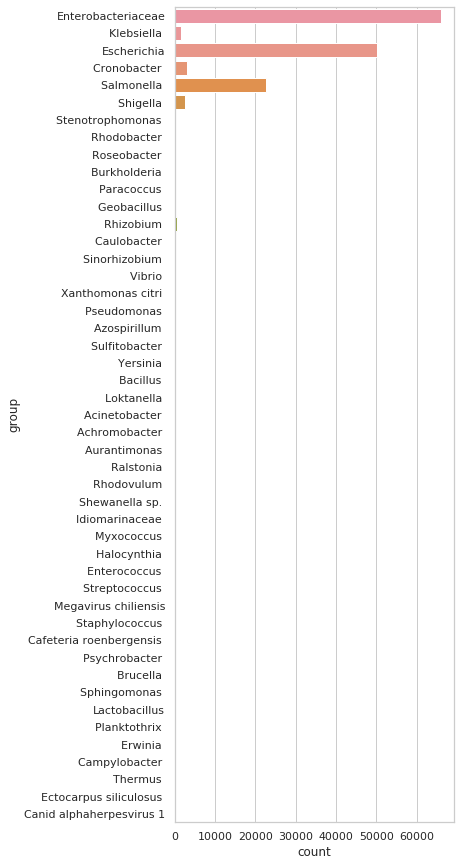

In [44]:
sns.set(rc={'figure.figsize':(5,15)})
sns.set_style(style="whitegrid")
sns.countplot(data=phage_combo, y='group')

In [45]:
phage_combo.group.unique()

array(['Enterobacteriaceae', 'Klebsiella ', 'Escherichia', 'Cronobacter ',
       'Salmonella ', 'Shigella ', 'Stenotrophomonas ', 'Rhodobacter ',
       'Roseobacter ', 'Burkholderia ', 'Paracoccus ', 'Geobacillus ',
       'Rhizobium ', 'Caulobacter ', 'Sinorhizobium ', 'Vibrio ',
       'Xanthomonas citri ', 'Pseudomonas ', 'Azospirillum ',
       'Sulfitobacter ', 'Yersinia ', 'Bacillus ', 'Loktanella ',
       'Acinetobacter ', 'Achromobacter ', 'Aurantimonas ', 'Ralstonia ',
       'Rhodovulum ', 'Shewanella sp. ', 'Idiomarinaceae ', 'Myxococcus ',
       'Halocynthia ', 'Enterococcus ', 'Streptococcus ',
       'Megavirus chiliensis', 'Staphylococcus ',
       'Cafeteria roenbergensis ', 'Psychrobacter ', 'Brucella ',
       'Sphingomonas ', 'Lactobacillus', 'Planktothrix ', 'Erwinia ',
       'Campylobacter ', 'Thermus ', 'Ectocarpus siliculosus ',
       'Canid alphaherpesvirus 1'], dtype=object)

In [46]:
taxaz_map = dict_partial({'Enterobacteriaceae':'Enterobacteriaceae', 'Escherichia':'Enterobacteriaceae',
            'Klebsiella': 'Enterobacteriaceae', 'Shigella':'Enterobacteriaceae', 'Salmonella': 'Enterobacteriaceae', 
            'Cronobacter':'Enterobacteriaceae', 'Stenotrophomonas':'Xanthomonadaceae', 
                          'Rhodobacter':'Rhodobacteraceae', 'Roseobacter':'Rhodobacteraceae', 
                         'Burkholderia':'Burkholderiaceae', 'Paracoccus': 'Rhodobacteraceae', 
                         'Geobacillus':'Bacilliaceae', 'Rhizobium':'Rhizobiaceae', 
                          'Caulobacter':'Caulobacteraceae',
                          'Sinorhizobium':'Rhizobiaceae', 'Vibrio':'Vibrionaceae', 'Xanthomonas':'Xanthomonadaceae',
                          'Pseudomonas':'Pseudomonadaceae', 'Azospirillum':'Azospirillaceae', 
                          'Sulfitobacter':'Rhodobacteraceae', 'Yersinia':'Yersiniaceae', 
                          'Bacillus':'Bacilliaceae', 'Loktanella':'Rhodobacteraceae','Acinetobacter':'Moraxellaceae',
                         'Achromobacter':'Alcaligenaceae', 'Aurantimonas':'Aurantimonadaceae', 
                         'Ralstonia':'Burkholderiaceae', 'Rhodovulum':'Rhodobacteraceae', 'Shewanella':'Shewanellaceae',
                         'Idiomarinaceae':'Idiomarinaceae', 'Myxococcus':'Myxococcaceae', 'Halocynthia':'Urochordate/tunicate', 
                         'Enterococcus':'Enterococcaceae', 'Streptococcus':'Streptococcaceae', 
                          'Staphylococcus':'Staphylococcaceae', 'Megavirus chiliensis':'Amoebas', 
                         'Cafeteria roenbergensis':'marine flagellate', 'Psychrobacter':'Moraxellaceae', 
                         'Brucella':'Brucellaceae', 'Sphingomonas':'Sphingomonadaceae', 'Lactobacillus':'Lactobacillaceae', 
                         'Planktothrix':'Microcoleaceae', 'Erwinia':'Erwiniaceae', 'Campylobacter':'Campylobacteraceae', 
                         'Ectocarpus siliculosus':'filamentous brown alga', 'Thermus':'Thermaceae', 'Canid alphaherpesvirus 1':'Canines'})
phage_combo['taxa_family_group'] = phage_combo['group'].apply(lambda x: taxaz_map[x])

In [47]:
phage_combo.head()

,viral_id,viral_hit,dramv_id,gene,phage,taxonomy,phage_id,box_id,cage_id,collection_timepoint,...,mouse_strain,qiita_study_id,sample_type,scientific_name,sex,taxon_id,tube_id,zarrinparlab_quant_ng_ul,group,taxa_family_group
0,YP_009914581.1,YP_009914581.1 HumD [Enterobacteria phage P7],27N_Day7_9,HumD,Enterobacteria phage P7,Enterobacteria,P7,11.0,27.0,Day7,...,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Enterobacteriaceae,Enterobacteriaceae
1,YP_006602.1,YP_006602.1 Gp22 [Klebsiella phage phiKO2],27N_Day7_9,Gp22,Klebsiella phage phiKO2,Klebsiella,phiKO2,11.0,27.0,Day7,...,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Klebsiella,Enterobacteriaceae
2,YP_009211929.1,YP_009211929.1 tail fiber assembly protein [Es...,27N_Day7_9,tail fiber assembly protein,Escherichia phage pro483,Escherichia,pro483,11.0,27.0,Day7,...,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Escherichia,Enterobacteriaceae
3,YP_009949279.1,YP_009949279.1 tail fiber assembly protein [Es...,27N_Day7_9,tail fiber assembly protein,Escherichia phage 500465-2,Escherichia,500465-2,11.0,27.0,Day7,...,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Escherichia,Enterobacteriaceae
4,YP_007112365.1,YP_007112365.1 tail fiber [Enterobacterial pha...,27N_Day7_9,tail fiber,Enterobacterial phage mEp213,Enterobacterial,mEp213,11.0,27.0,Day7,...,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Enterobacteriaceae,Enterobacteriaceae


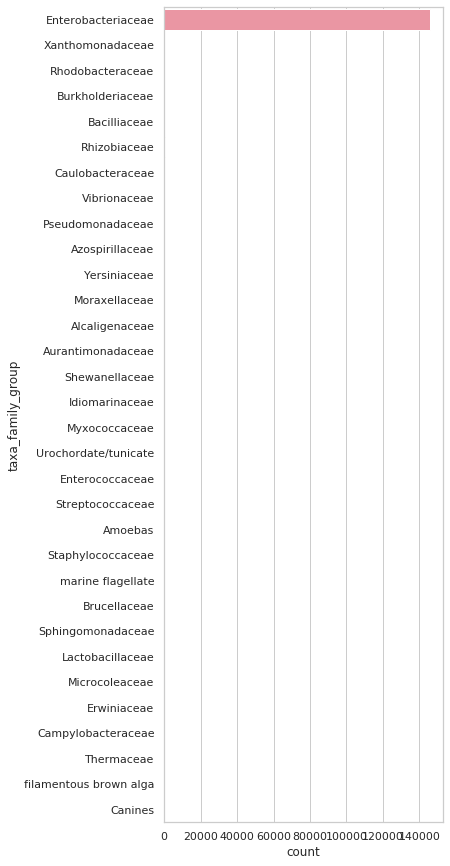

In [48]:
sns.set(rc={'figure.figsize':(5,15)})
sns.set_style(style="whitegrid")
sns.countplot(data=phage_combo, y='taxa_family_group')

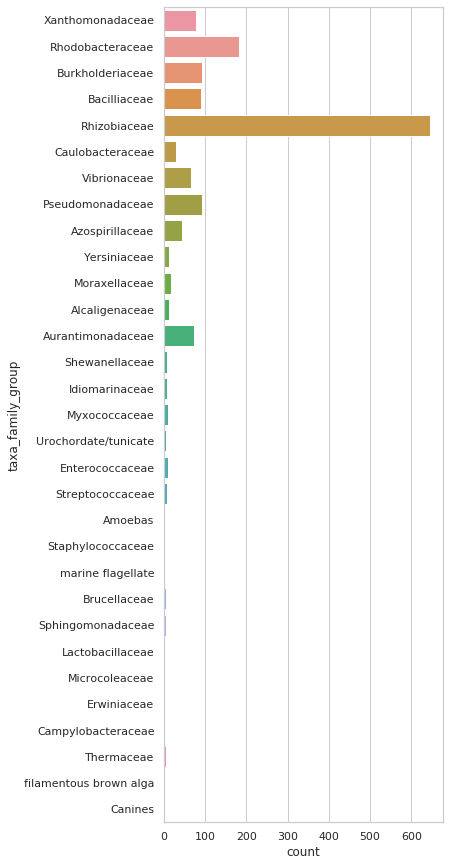

In [49]:
sns.set(rc={'figure.figsize':(5,15)})
sns.set_style(style="whitegrid")
sns.countplot(data=phage_combo[phage_combo['taxa_family_group'] != 'Enterobacteriaceae'], y='taxa_family_group')

In [50]:
taxaf_map = dict_partial({'Enterobacteriaceae':'gram negative', 'Xanthomonadaceae':'gram negative', 
                          'Rhodobacteraceae':'gram negative', 'Burkholderiaceae':'gram negative', 
                          'Rhodobacteraceae':'gram negative', 'Rhizobiaceae':'gram negative',
                          'Bacilliaceae':'gram positive', 'Caulobacteraceae':'gram negative',
                          'Vibrionaceae':'gram negative', 'Pseudomonadaceae':'gram negative', 
                          'Azospirillaceae':'gram negative', 'Yersiniaceae':'gram negative',
                         'Moraxellaceae':'gram negative', 'Alcaligenaceae':'gram negative', 
                         'Aurantimonadaceae':'gram negative', 'Shewanellaceae':'gram negative',
                         'Idiomarinaceae':'gram negative', 'Myxococcaceae':'gram negative', 
                          'Urochordate/tunicate':'Other', 'Enterococcaceae':'gram positive',
                         'Streptococcaceae':'gram positive', 'Staphylococcaceae':'gram positive', 
                         'Amoebas':'Other', 'marine flagellate':"Other", 'Brucellaceae':'gram negative',
                         'Sphingomonadaceae':'gram negative', 'Lactobacillaceae':'gram positive', 
                         'Microcoleaceae':'Other', 'Erwiniaceae':'gram negative', 
                         'Campylobacteraceae':'gram negative', 'filamentous brown alga':'Other', 
                         'Thermaceae':'gram negative', 'Canines':"Other"})
phage_combo['taxa_overview_group'] = phage_combo['taxa_family_group'].apply(lambda x: taxaf_map[x])

In [51]:
phage_combo.head()

,viral_id,viral_hit,dramv_id,gene,phage,taxonomy,phage_id,box_id,cage_id,collection_timepoint,...,qiita_study_id,sample_type,scientific_name,sex,taxon_id,tube_id,zarrinparlab_quant_ng_ul,group,taxa_family_group,taxa_overview_group
0,YP_009914581.1,YP_009914581.1 HumD [Enterobacteria phage P7],27N_Day7_9,HumD,Enterobacteria phage P7,Enterobacteria,P7,11.0,27.0,Day7,...,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Enterobacteriaceae,Enterobacteriaceae,gram negative
1,YP_006602.1,YP_006602.1 Gp22 [Klebsiella phage phiKO2],27N_Day7_9,Gp22,Klebsiella phage phiKO2,Klebsiella,phiKO2,11.0,27.0,Day7,...,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Klebsiella,Enterobacteriaceae,gram negative
2,YP_009211929.1,YP_009211929.1 tail fiber assembly protein [Es...,27N_Day7_9,tail fiber assembly protein,Escherichia phage pro483,Escherichia,pro483,11.0,27.0,Day7,...,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Escherichia,Enterobacteriaceae,gram negative
3,YP_009949279.1,YP_009949279.1 tail fiber assembly protein [Es...,27N_Day7_9,tail fiber assembly protein,Escherichia phage 500465-2,Escherichia,500465-2,11.0,27.0,Day7,...,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Escherichia,Enterobacteriaceae,gram negative
4,YP_007112365.1,YP_007112365.1 tail fiber [Enterobacterial pha...,27N_Day7_9,tail fiber,Enterobacterial phage mEp213,Enterobacterial,mEp213,11.0,27.0,Day7,...,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Enterobacteriaceae,Enterobacteriaceae,gram negative


In [52]:
phage_combo[['group','phage_id', 'taxa_overview_group']].groupby('group')['phage_id'].count().nlargest(10)

group
Enterobacteriaceae    65963
Escherichia           50095
Salmonella            10516
Cronobacter            3010
Shigella               2562
Klebsiella             1498
Rhizobium               597
Rhodobacter              99
Pseudomonas              91
Burkholderia             75
Name: phage_id, dtype: int64

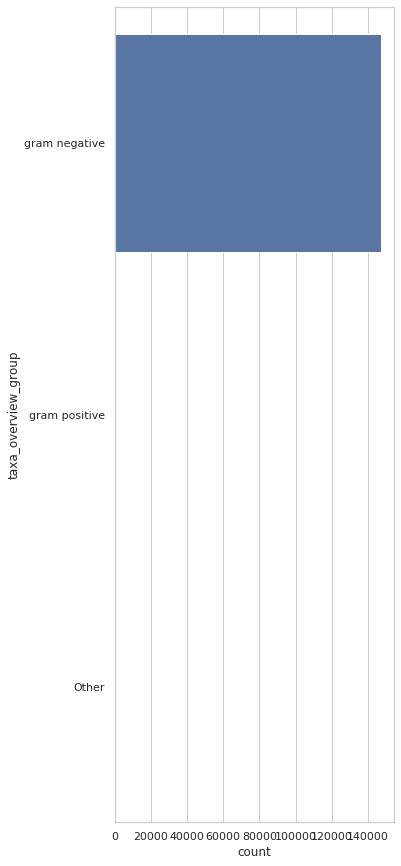

In [53]:
sns.set(rc={'figure.figsize':(5,15)})
sns.set_style(style="whitegrid")
sns.countplot(data=phage_combo, y='taxa_overview_group')

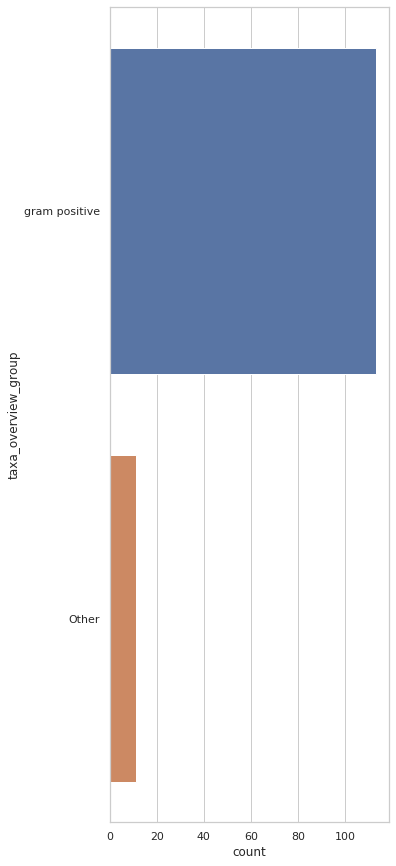

In [54]:
sns.set(rc={'figure.figsize':(5,15)})
sns.set_style(style="whitegrid")
sns.countplot(data=phage_combo[phage_combo['taxa_overview_group'] != "gram negative"], y='taxa_overview_group')

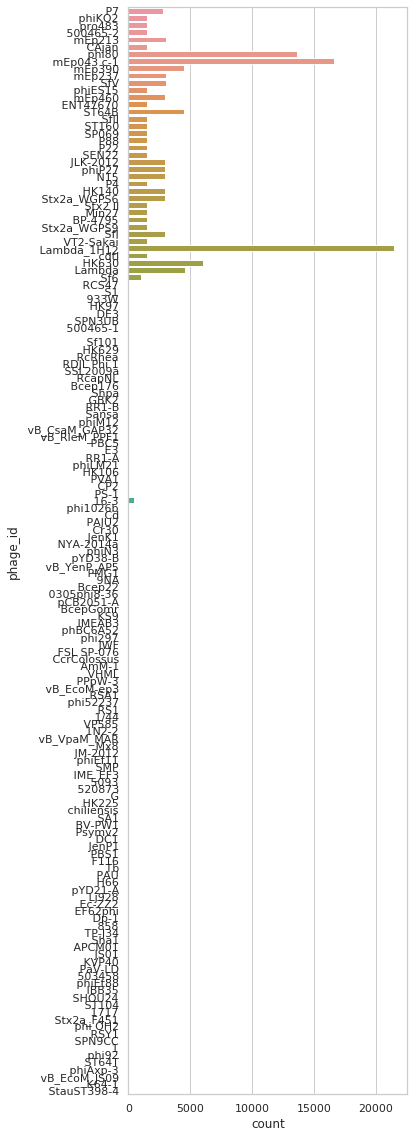

In [55]:
sns.set(rc={'figure.figsize':(5,20)})
sns.set_style(style="whitegrid")
sns.countplot(data=phage_combo, y='phage_id')

In [56]:
pid = phage_combo.phage_id.value_counts()

In [57]:
pid

 Lambda_1H12     21471
 mEp043 c-1      16656
 phi80           13616
 HK630            6069
 Lambda           4582
 ST64B            4510
 mEp390           4506
 SfV              3023
 mEp213           3013
 mEp237           3013
 N15              2992
 SfI              2986
 mEp460           2977
 phiP27           2970
 JLK-2012         2964
 HK140            2960
 Stx2a_WGPS6      2942
 P7               2785
 SfII             1511
 ENT47670         1502
 500465-2         1499
 phiKO2           1497
 Stx2 II          1497
 cdtI             1496
 ST160            1496
 CAjan            1496
 phiES15          1496
 Stx2a_WGPS9      1494
 VT2-Sakai        1493
 pro483           1492
                 ...  
 IME_EF3             2
 phi92               1
 IBB35               1
 HK225               1
 ST64T               1
 SPN9CC              1
 phiAxp-3            1
 Ec-ZZ2              1
 APCM01              1
 vB_EcoM_JS09        1
 K64-1               1
 503458              1
 StauST398-

In [58]:
top_list = pid[pid>1000].index.tolist()
top_list

[' Lambda_1H12',
 ' mEp043 c-1',
 ' phi80',
 ' HK630',
 ' Lambda',
 ' ST64B',
 ' mEp390',
 ' SfV',
 ' mEp213',
 ' mEp237',
 ' N15',
 ' SfI',
 ' mEp460',
 ' phiP27',
 ' JLK-2012',
 ' HK140',
 ' Stx2a_WGPS6',
 ' P7',
 ' SfII',
 ' ENT47670',
 ' 500465-2',
 ' phiKO2',
 ' Stx2 II',
 ' cdtI',
 ' ST160',
 ' CAjan',
 ' phiES15',
 ' Stx2a_WGPS9',
 ' VT2-Sakai',
 ' pro483',
 ' P22',
 ' SP069',
 ' BP-4795',
 ' SEN22',
 ' Min27',
 ' P88',
 ' P4',
 ' Sf6']

In [59]:
top_phage_combo = phage_combo[phage_combo.phage_id.isin(top_list)]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


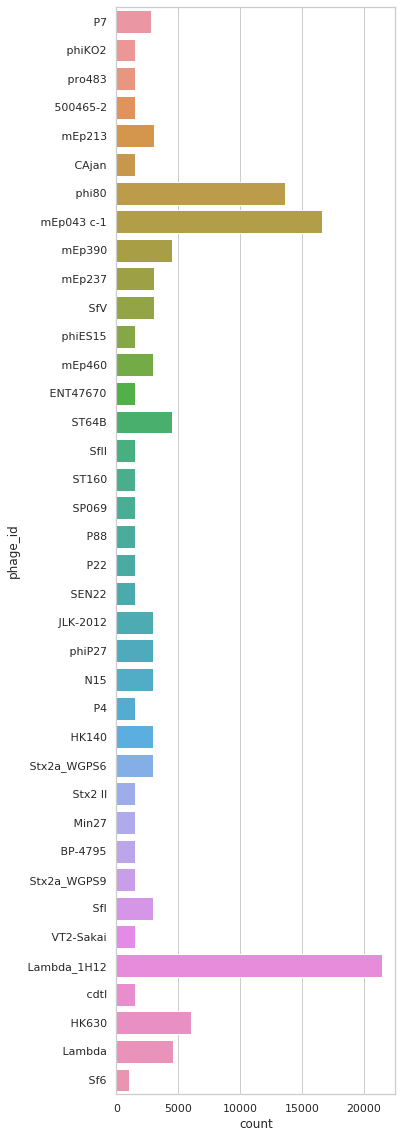

In [60]:
sns.countplot(data=top_phage_combo, y='phage_id')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('./top_phage.pdf', dpi=300, bbox_inches="tight")

In [61]:
bottom_list = pid[pid<1000].index.tolist()

In [62]:
bottom_phage_combo = phage_combo[phage_combo.phage_id.isin(bottom_list)]

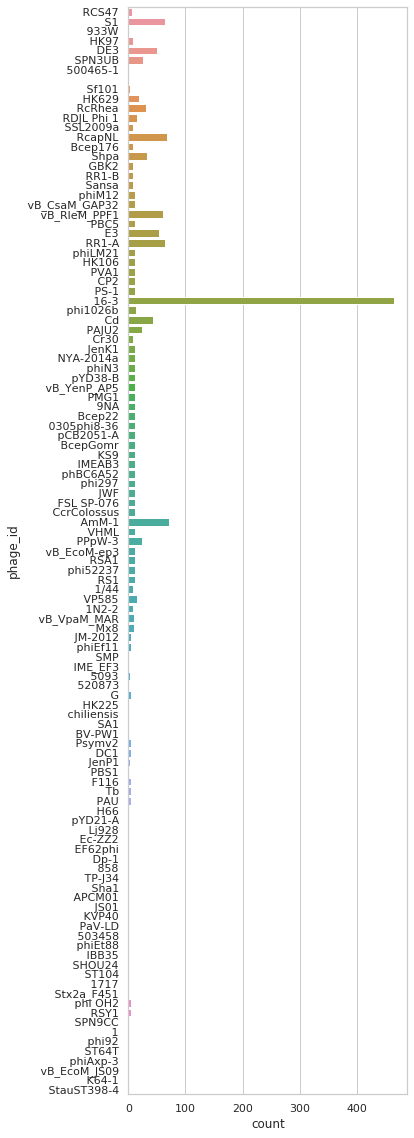

In [63]:
sns.set(rc={'figure.figsize':(5,20)})
sns.set_style(style="whitegrid")
sns.countplot(data=bottom_phage_combo, y='phage_id')

In [64]:
phage_combo.groupby(['collection_timepoint']).agg({'phage_id': 'value_counts'})

phage_id
collection_timepoint phage_id               
Day7                  Lambda_1H12       8310
                      mEp043 c-1        6413
                      phi80             5244
                      HK630             2332
                      Lambda            1804
                      ST64B             1747
                      mEp390            1744
                      mEp213            1168
                      SfV               1162
                      mEp460            1159
                      mEp237            1158
                      JLK-2012          1156
                      SfI               1156
                      phiP27            1152
                      N15               1149
                      HK140             1146
                      Stx2a_WGPS6       1136
                      P7                1076
                      SfII               589
                      ST160              583
                      ENT47670           582
                      phiES15            581
                      SP069              580
                      Stx2 II            580
                      cdtI               579
                      500465-2           578
                      CAjan              578
                      P22                578
                      P88                578
                      SEN22              577
...                                      ...
Month6                BP-4795            387
                      Stx2 II            387
                      Stx2a_WGPS9        387
                      VT2-Sakai          387
                      Min27              383
                      ENT47670           382
                      ST160              382
                      SfII               382
                      phiES15            382
                      500465-2           379
                      CAjan              379
                      cdtI               379
                      P22                378
                      SP069              378
                      phiKO2             378
                      pro483             378
                      P88                377
                      SEN22              377
                      P4                 375
                      Sf6                106
                      SPN3UB               4
                      1                    1
                      BV-PW1               1
                      G                    1
                      HK97                 1
                      S1                   1
                      ST64T                1
                      phi1026b             1
                      phiAxp-3             1
                      vB_EcoM_JS09         1

[244 rows x 1 columns]

In [145]:
iso_num = []
num_found = []
phage_id = []
ctp = []
total_found = []

for t in phage_combo.collection_timepoint.unique():
    ydf = phage_combo[phage_combo['collection_timepoint'] == t]
    for phg in ydf.phage_id.unique():
        ctp.append(t)
        total_found.append(len(ydf.dramv_id.unique()))
        xdf = ydf[ydf['phage_id'] == phg]
        phage_id.append(phg)
        iso_num.append(len(xdf.dramv_id.unique()))
        num_found.append(len(xdf))

In [146]:
indv_phage  = pd.DataFrame()
indv_phage['timepoint'] = ctp
indv_phage['phage_id'] = phage_id
indv_phage['num_phage_found'] = num_found
indv_phage['num_isolates'] = iso_num
indv_phage['total_isolates_at_TP'] = total_found
indv_phage.head()

,timepoint,phage_id,num_phage_found,num_isolates,total_isolates_at_TP
0,Day7,P7,1076,565,570
1,Day7,phiKO2,575,561,570
2,Day7,pro483,576,561,570
3,Day7,500465-2,578,561,570
4,Day7,mEp213,1168,566,570


In [67]:
indvM6 = set(indv_phage[indv_phage['timepoint'] == 'Month6'].phage_id.values)
indvM3 = set(indv_phage[indv_phage['timepoint'] == 'Month3'].phage_id.values)
indvD7 = set(indv_phage[indv_phage['timepoint'] == 'Day7'].phage_id.values)
common_indv = indvD7.intersection(indvM3, indvM6)

In [68]:
len(common_indv)

43

In [69]:
common_indv_phage = indv_phage[indv_phage['phage_id'].isin(common_indv)].copy()
common_indv_phage.shape

(129, 4)

In [70]:
common_indv_phage.dropna(inplace=True)

In [71]:
common_indv_phage.head(10)

,timepoint,phage_id,num_phage_found,num_isolates
0,Day7,P7,1076,565
1,Day7,phiKO2,575,561
2,Day7,pro483,576,561
3,Day7,500465-2,578,561
4,Day7,mEp213,1168,566
5,Day7,CAjan,578,561
6,Day7,phi80,5244,569
7,Day7,mEp043 c-1,6413,570
8,Day7,mEp390,1744,566
9,Day7,mEp237,1158,563


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Day7 v.s. Month3: Mann-Whitney-Wilcoxon test two-sided P_val=3.036e-02 U_stat=1.124e+03
Month3 v.s. Month6: Mann-Whitney-Wilcoxon test two-sided P_val=1.270e-02 U_stat=1.161e+03
Day7 v.s. Month6: Mann-Whitney-Wilcoxon test two-sided P_val=8.856e-03 U_stat=1.175e+03


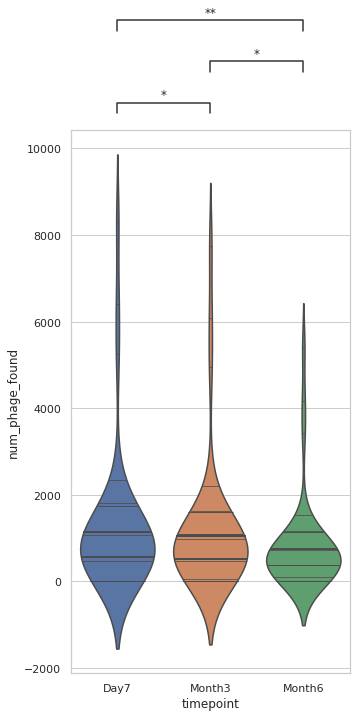

In [73]:
ax= sns.violinplot(data=common_indv_phage, x='timepoint', y='num_phage_found', order=['Day7', 'Month3', 'Month6'],
              scale="count", inner="stick")
ax, test_results = add_stat_annotation(ax, data=common_indv_phage, x='timepoint', y='num_phage_found', 
                                       order=['Day7', 'Month3', 'Month6'],
                                   box_pairs=[("Day7", "Month3"), ("Day7", "Month6"), ("Month3", "Month6")],
                                   test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
#does not account for different number of isolates found at each timepoint

In [74]:
common_indv_phage['avg_phage_per_isolate'] = common_indv_phage['num_phage_found']/common_indv_phage['num_isolates']

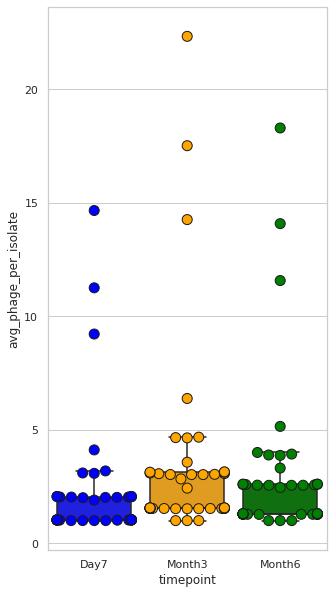

In [75]:
sns.set(rc={'figure.figsize':(5,10)})
sns.set_style(style="whitegrid")
x = sns.boxplot(data=common_indv_phage, x='timepoint', y='avg_phage_per_isolate', 
                order=['Day7', 'Month3', 'Month6'], palette=['blue', 'orange', 'green'])
x = sns.swarmplot(data=common_indv_phage, x='timepoint', y='avg_phage_per_isolate', 
                  order=['Day7', 'Month3', 'Month6'], palette=['blue', 'orange', 'green'], 
                  size=10, edgecolor='k', linewidth=1)
#does not account for the difference in the total number of isolates found for each timepoint

In [76]:
common_indv_phage2 = common_indv_phage[['timepoint', 'phage_id', 'avg_phage_per_isolate']].copy()
common_indv_phage22 = common_indv_phage2.pivot(index='timepoint', columns='phage_id')['avg_phage_per_isolate']
common_indv_phage22

phage_id,500465-2,BP-4795,CAjan,ENT47670,G,HK140,HK630,HK97,JLK-2012,Lambda,...,mEp043 c-1,mEp213,mEp237,mEp390,mEp460,phi80,phiES15,phiKO2,phiP27,pro483
timepoint,,,,,,,,,,,,,,,,,,,,,
Day7,1.030303,1.019643,1.030303,1.031915,1.0,2.035524,4.112875,1.0,2.038801,3.187279,...,11.250877,2.063604,2.056838,3.081272,2.051327,9.216169,1.030142,1.024955,2.057143,1.026738
Month3,1.561960,1.539359,1.553314,1.554913,1.0,3.037681,6.377522,1.0,3.028818,4.654179,...,17.510086,3.132565,3.130058,4.642651,3.069364,14.256484,1.544928,1.523810,3.025641,1.550432
Month6,1.280405,1.307432,1.280405,1.290541,1.0,2.587838,5.148649,1.0,2.557432,3.929054,...,14.077703,2.560811,2.608108,3.888514,2.554054,11.570946,1.290541,1.277027,2.554054,1.277027


In [77]:
common_indv_phage222 = common_indv_phage22.reindex(common_indv_phage22.mean().sort_values().index, axis=1)
common_indv_phage222

phage_id,G,HK97,phiKO2,P4,P88,Min27,SP069,SEN22,pro483,P22,...,mEp237,SfV,Sf6,mEp390,ST64B,Lambda,HK630,phi80,mEp043 c-1,Lambda_1H12
timepoint,,,,,,,,,,,,,,,,,,,,,
Day7,1.0,1.0,1.024955,1.026978,1.033989,1.017794,1.033868,1.030357,1.026738,1.033989,...,2.056838,2.063943,2.008547,3.081272,3.097518,3.187279,4.112875,9.216169,11.250877,14.656085
Month3,1.0,1.0,1.523810,1.531977,1.521866,1.524638,1.533333,1.545190,1.550432,1.543605,...,3.130058,3.147399,3.571429,4.642651,4.673410,4.654179,6.377522,14.256484,17.510086,22.325648
Month6,1.0,1.0,1.277027,1.271186,1.277966,1.293919,1.277027,1.277966,1.277027,1.277027,...,2.608108,2.608108,3.312500,3.888514,3.871622,3.929054,5.148649,11.570946,14.077703,18.290541


In [78]:
from matplotlib.colors import ListedColormap

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


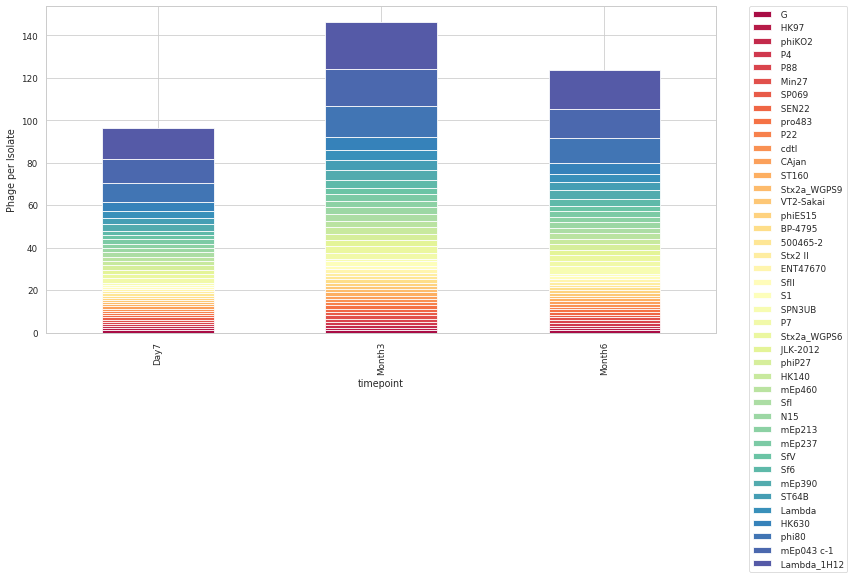

In [79]:
sns.set('paper')
sns.set_style(style="whitegrid")
common_indv_phage222.plot(kind='bar', stacked=True,
          colormap=ListedColormap(sns.color_palette("Spectral", 42)), 
          figsize=(12,6))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylabel('Phage per Isolate')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('./phage_composition.pdf', dpi=300, bbox_inches="tight")

In [80]:
common_indv_phage222.iloc[: , -10:].columns
#top ten phage present

Index([' mEp237', ' SfV', ' Sf6', ' mEp390', ' ST64B', ' Lambda', ' HK630',
       ' phi80', ' mEp043 c-1', ' Lambda_1H12'],
      dtype='object', name='phage_id')

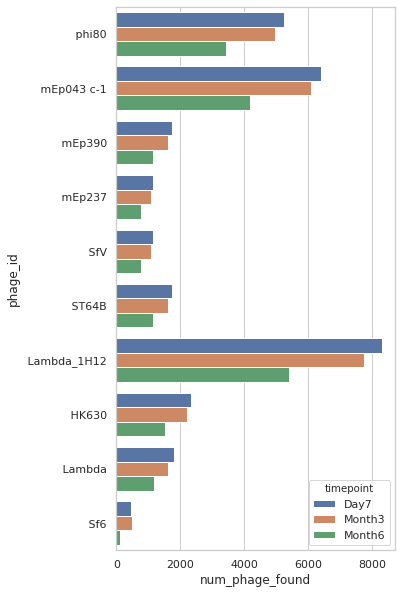

In [81]:
sns.set(rc={'figure.figsize':(5,10)})
sns.set_style(style="whitegrid")
sns.barplot(y='phage_id', x="num_phage_found", hue='timepoint', hue_order=['Day7', 'Month3', 'Month6'], 
            data=common_indv_phage[common_indv_phage['phage_id'].isin(common_indv_phage222.iloc[: , -10:].columns)])
#absolute number of detected phage went down over time, but there were decreasing numbers of isolates found

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


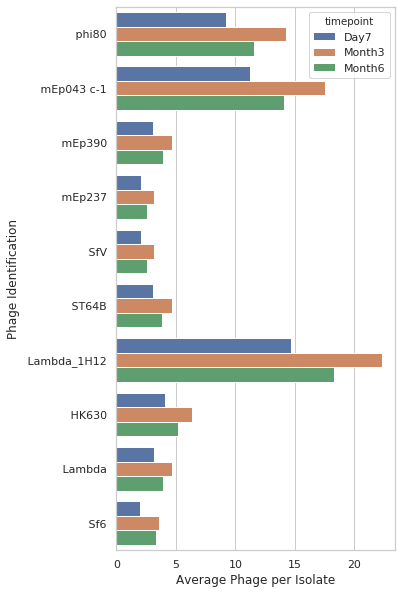

In [82]:
sns.set(rc={'figure.figsize':(5,10)})
sns.set_style(style="whitegrid")
sns.barplot(y='phage_id', x="avg_phage_per_isolate", hue='timepoint', hue_order=['Day7', 'Month3', 'Month6'], 
            data=common_indv_phage[common_indv_phage['phage_id'].isin(common_indv_phage222.iloc[: , -10:].columns)])
#average number of these phage per isolate went up over time (generally)

plt.ylabel('Phage Identification')
plt.xlabel('Average Phage per Isolate')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('./common_phage_per_isolate.pdf', dpi=300, bbox_inches="tight")

### next up, by Host Taxonomic Group (and time point)!

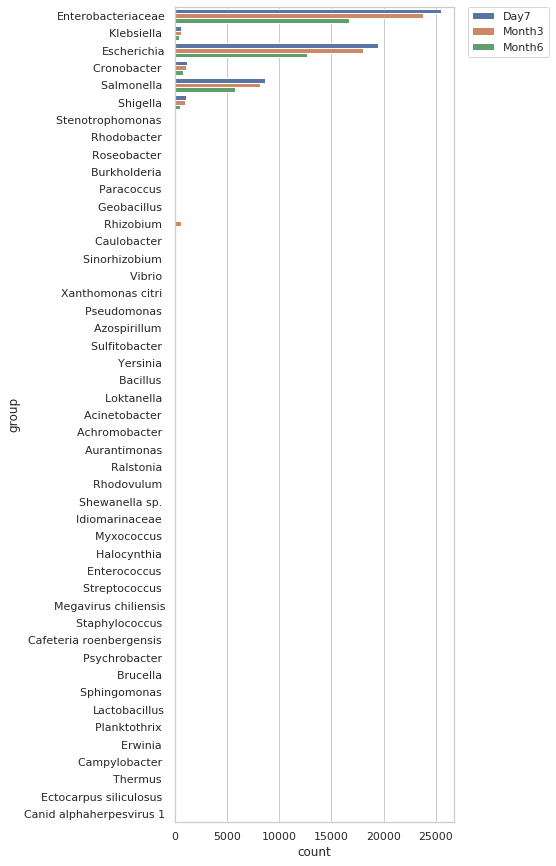

In [83]:
sns.set(rc={'figure.figsize':(5,15)})
sns.set_style(style="whitegrid")
sns.countplot(data=phage_combo, y='group', hue='collection_timepoint', hue_order=['Day7', 'Month3', 'Month6'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

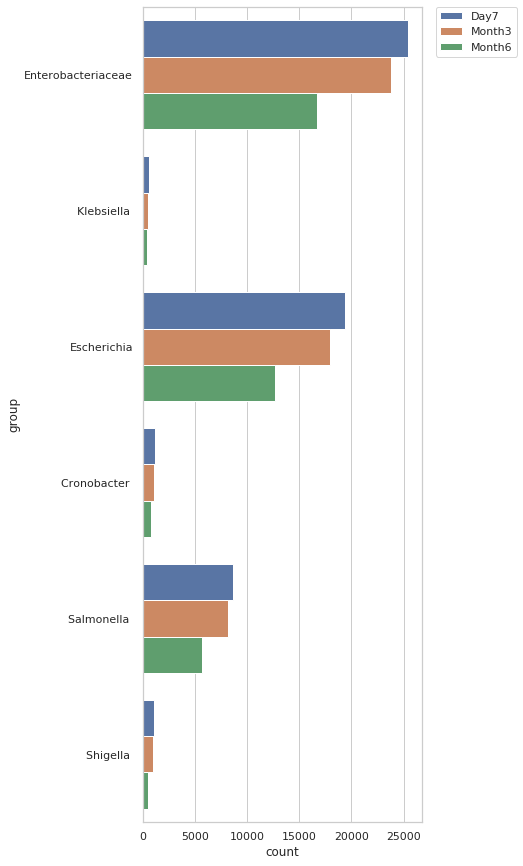

In [84]:
to_keep = ['Enterobacteriaceae', 'Klebsiella ', 'Escherichia', 'Cronobacter ',
       'Salmonella ', 'Shigella ', 'Salmonella host']
sns.set(rc={'figure.figsize':(5,15)})
sns.set_style(style="whitegrid")
sns.countplot(data=phage_combo[phage_combo.group.isin(to_keep)], y='group', hue='collection_timepoint', hue_order=['Day7', 'Month3', 'Month6'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

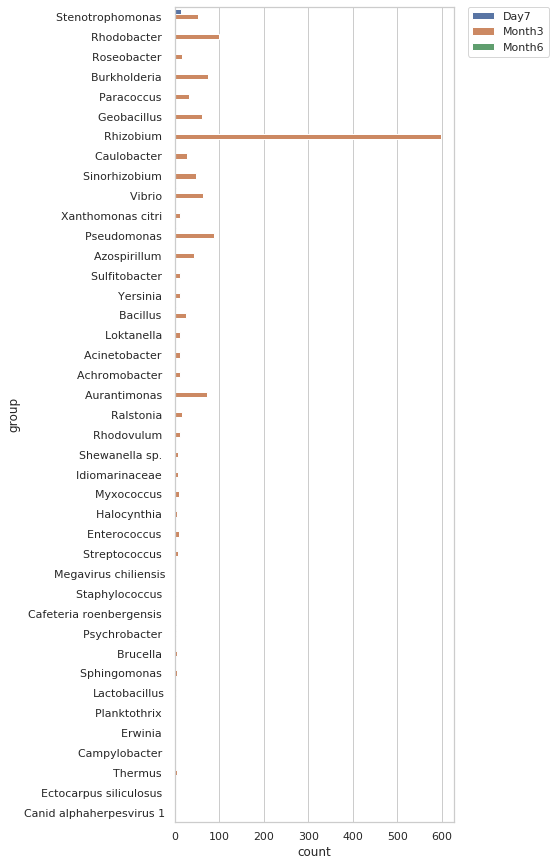

In [85]:
to_keep = ['Enterobacteriaceae', 'Klebsiella ', 'Escherichia', 'Cronobacter ',
       'Salmonella ', 'Shigella ', 'Salmonella host']
sns.set(rc={'figure.figsize':(5,15)})
sns.set_style(style="whitegrid")
sns.countplot(data=phage_combo[~phage_combo.group.isin(to_keep)], y='group', hue='collection_timepoint', hue_order=['Day7', 'Month3', 'Month6'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [86]:
s = phage_combo.group.value_counts()
pc_sort = phage_combo.set_index('group').loc[s.index].reset_index().drop_duplicates('group')
pc_sort.head(10)

,group,viral_id,viral_hit,dramv_id,gene,phage,taxonomy,phage_id,box_id,cage_id,...,mouse_strain,qiita_study_id,sample_type,scientific_name,sex,taxon_id,tube_id,zarrinparlab_quant_ng_ul,taxa_family_group,taxa_overview_group
0,Enterobacteriaceae,YP_009914581.1,YP_009914581.1 HumD [Enterobacteria phage P7],27N_Day7_9,HumD,Enterobacteria phage P7,Enterobacteria,P7,11.0,27.0,...,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Enterobacteriaceae,gram negative
65963,Escherichia,YP_009211929.1,YP_009211929.1 tail fiber assembly protein [Es...,27N_Day7_9,tail fiber assembly protein,Escherichia phage pro483,Escherichia,pro483,11.0,27.0,...,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Enterobacteriaceae,gram negative
116058,Salmonella,NP_700418.1,NP_700418.1 RusA family crossover junction end...,27N_Day7_9,RusA family crossover junction endodeoxyribonu...,Salmonella phage ST64B,Salmonella,ST64B,11.0,27.0,...,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Enterobacteriaceae,gram negative
138605,Cronobacter,YP_006590025.1,YP_006590025.1 putative antitermination protei...,27N_Day7_9,putative antitermination protein Q,Cronobacter phage phiES15,Cronobacter,phiES15,11.0,27.0,...,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Enterobacteriaceae,gram negative
141615,Shigella,YP_008318519.1,YP_008318519.1 helix-turn-helix domain-contain...,27N_Day7_9,helix-turn-helix domain-containing protein,Shigella phage SfII,Shigella,SfII,11.0,27.0,...,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Enterobacteriaceae,gram negative
144177,Klebsiella,YP_006602.1,YP_006602.1 Gp22 [Klebsiella phage phiKO2],27N_Day7_9,Gp22,Klebsiella phage phiKO2,Klebsiella,phiKO2,11.0,27.0,...,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Enterobacteriaceae,gram negative
145675,Rhizobium,YP_008129834.1,YP_008129834.1 hypothetical protein RHYG_00020...,28LL_Month3_24,hypothetical protein RHYG_00020,Rhizobium phage RR1-B,Rhizobium,RR1-B,5.0,28.0,...,C57Bl/6,12986,feces,mouse gut metagenome,female,410661,28LL-24_Month3,45.2,Rhizobiaceae,gram negative
146272,Rhodobacter,YP_009213485.1,YP_009213485.1 tail protein [Rhodobacter phage...,28LL_Month3_24,tail protein,Rhodobacter phage RcRhea,Rhodobacter,RcRhea,5.0,28.0,...,C57Bl/6,12986,feces,mouse gut metagenome,female,410661,28LL-24_Month3,45.2,Rhodobacteraceae,gram negative
146371,Pseudomonas,YP_009222804.1,YP_009222804.1 NinB DNA recombinase [Pseudomon...,28LL_Month3_24,NinB DNA recombinase,Pseudomonas phage PS-1,Pseudomonas,PS-1,5.0,28.0,...,C57Bl/6,12986,feces,mouse gut metagenome,female,410661,28LL-24_Month3,45.2,Pseudomonadaceae,gram negative
146462,Burkholderia,YP_355412.1,YP_355412.1 major capsid protein [Burkholderia...,28LL_Month3_24,major capsid protein,Burkholderia phage Bcep176,Burkholderia,Bcep176,5.0,28.0,...,C57Bl/6,12986,feces,mouse gut metagenome,female,410661,28LL-24_Month3,45.2,Burkholderiaceae,gram negative


In [87]:
p = phage_combo.phage_id.value_counts()
pc_sort_indv = phage_combo.set_index('phage_id').loc[p.index].reset_index().drop_duplicates('phage_id')
pc_sort_indv.head(10)

,phage_id,viral_id,viral_hit,dramv_id,gene,phage,taxonomy,box_id,cage_id,collection_timepoint,...,qiita_study_id,sample_type,scientific_name,sex,taxon_id,tube_id,zarrinparlab_quant_ng_ul,group,taxa_family_group,taxa_overview_group
0,Lambda_1H12,YP_009909551.1,YP_009909551.1 Phage NinX [Escherichia virus L...,27N_Day7_9,Phage NinX,Escherichia virus Lambda_1H12,Escherichia,11.0,27.0,Day7,...,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Escherichia,Enterobacteriaceae,gram negative
21471,mEp043 c-1,YP_007111519.1,YP_007111519.1 C40 family peptidase [Enterobac...,27N_Day7_9,C40 family peptidase,Enterobacteria phage mEp043 c-1,Enterobacteria,11.0,27.0,Day7,...,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Enterobacteriaceae,Enterobacteriaceae,gram negative
38127,phi80,YP_007947944.1,YP_007947944.1 tail assembly protein [Enteroba...,27N_Day7_9,tail assembly protein,Enterobacteria phage phi80,Enterobacteria,11.0,27.0,Day7,...,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Enterobacteriaceae,Enterobacteriaceae,gram negative
51743,HK630,YP_007112548.1,YP_007112548.1 head-tail joining protein [Esch...,27N_Day7_9,head-tail joining protein,Escherichia phage HK630,Escherichia,11.0,27.0,Day7,...,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Escherichia,Enterobacteriaceae,gram negative
57812,Lambda,NP_040596.1,NP_040596.1 tail protein [Escherichia virus La...,27N_Day7_9,tail protein,Escherichia virus Lambda,Escherichia,11.0,27.0,Day7,...,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Escherichia,Enterobacteriaceae,gram negative
62394,ST64B,NP_700418.1,NP_700418.1 RusA family crossover junction end...,27N_Day7_9,RusA family crossover junction endodeoxyribonu...,Salmonella phage ST64B,Salmonella,11.0,27.0,Day7,...,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Salmonella,Enterobacteriaceae,gram negative
66904,mEp390,YP_007112470.1,YP_007112470.1 hypothetical protein F859_gp53 ...,27N_Day7_9,hypothetical protein F859_gp53,Enterobacterial phage mEp390,Enterobacterial,11.0,27.0,Day7,...,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Enterobacteriaceae,Enterobacteriaceae,gram negative
71410,SfV,NP_599080.1,NP_599080.1 hypothetical protein SfVp48 [Enter...,27N_Day7_9,hypothetical protein SfVp48,Enterobacteria phage SfV,Enterobacteria,11.0,27.0,Day7,...,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Enterobacteriaceae,Enterobacteriaceae,gram negative
74433,mEp213,YP_007112365.1,YP_007112365.1 tail fiber [Enterobacterial pha...,27N_Day7_9,tail fiber,Enterobacterial phage mEp213,Enterobacterial,11.0,27.0,Day7,...,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Enterobacteriaceae,Enterobacteriaceae,gram negative
77446,mEp237,YP_007111431.1,YP_007111431.1 lysin [Enterobacteria phage mEp...,27N_Day7_9,lysin,Enterobacteria phage mEp237,Enterobacteria,11.0,27.0,Day7,...,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,Enterobacteriaceae,Enterobacteriaceae,gram negative


### by Overview Group (and time point)

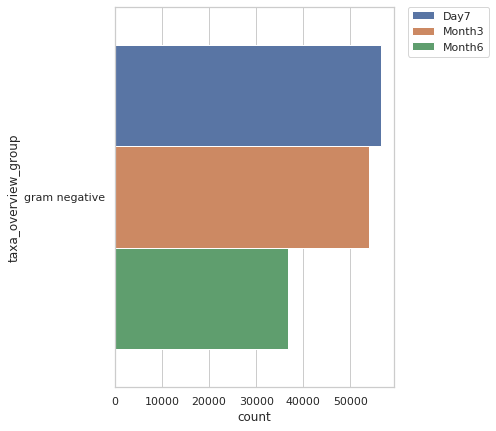

In [88]:
sns.set(rc={'figure.figsize':(5,7)})
sns.set_style(style="whitegrid")
sns.countplot(data=phage_combo[phage_combo['taxa_overview_group'] == "gram negative"], y='taxa_overview_group', hue='collection_timepoint', hue_order=['Day7', 'Month3', 'Month6'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

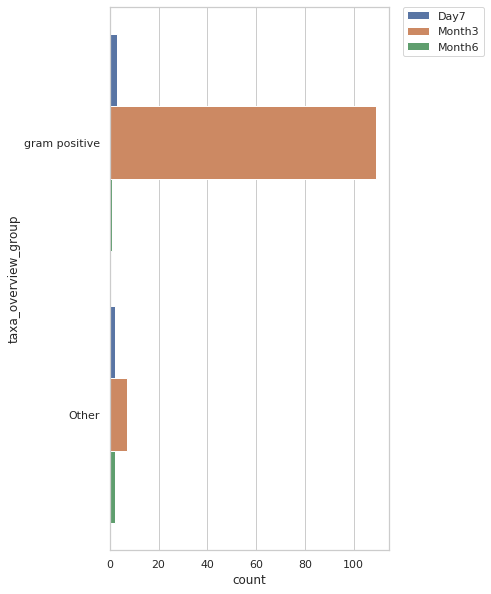

In [89]:
sns.set(rc={'figure.figsize':(5,10)})
sns.set_style(style="whitegrid")
sns.countplot(data=phage_combo[phage_combo['taxa_overview_group'] != "gram negative"], y='taxa_overview_group', hue='collection_timepoint', hue_order=['Day7', 'Month3', 'Month6'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [90]:
phage_combo.groupby(['collection_timepoint']).agg({'group': 'value_counts'})

group
collection_timepoint group                          
Day7                 Enterobacteriaceae        25458
                     Escherichia               19423
                     Salmonella                 8687
                     Cronobacter                1163
                     Shigella                   1059
                     Klebsiella                  576
                     Stenotrophomonas             13
                     Pseudomonas                   3
                     Vibrio                        3
                     Bacillus                      2
                     Psychrobacter                 2
                     Campylobacter                 1
                     Ectocarpus siliculosus        1
                     Erwinia                       1
                     Planktothrix                  1
                     Staphylococcus                1
Month3               Enterobacteriaceae        23783
                     Escherichia               17988
                     Salmonella                 8138
                     Cronobacter                1083
                     Shigella                   1015
                     Rhizobium                   597
                     Klebsiella                  544
                     Rhodobacter                  99
                     Pseudomonas                  88
                     Burkholderia                 74
                     Aurantimonas                 72
                     Vibrio                       63
                     Geobacillus                  61
                     Stenotrophomonas             51
...                                              ...
                     Rhodovulum                   12
                     Sulfitobacter                12
                     Xanthomonas citri            12
                     Yersinia                     12
                     Enterococcus                 10
                     Myxococcus                   10
                     Idiomarinaceae                8
                     Shewanella sp.                8
                     Streptococcus                 8
                     Brucella                      5
                     Halocynthia                   5
                     Sphingomonas                  5
                     Thermus                       4
                     Psychrobacter                 3
                     Lactobacillus                 2
                     Staphylococcus                2
                     Cafeteria roenbergensis       1
                     Megavirus chiliensis          1
Month6               Enterobacteriaceae        16722
                     Escherichia               12684
                     Salmonella                 5722
                     Cronobacter                 764
                     Shigella                    488
                     Klebsiella                  378
                     Achromobacter                 1
                     Bacillus                      1
                     Burkholderia                  1
                     Cafeteria roenbergensis       1
                     Canid alphaherpesvirus 1      1
                     Stenotrophomonas              1

[70 rows x 1 columns]

In [91]:
phage_combo.groupby(['collection_timepoint']).agg({'taxa_overview_group': 'value_counts'})

taxa_overview_group
collection_timepoint taxa_overview_group                     
Day7                 gram negative                      56389
                     gram positive                          3
                     Other                                  2
Month3               gram negative                      53906
                     gram positive                        109
                     Other                                  7
Month6               gram negative                      36761
                     Other                                  2
                     gram positive                          1

In [92]:
#divide by 'dramv_id' unique? get phage per sample

In [93]:
pcdf = phage_combo[['group', 'taxa_overview_group', 'dramv_id', 'collection_timepoint']].copy()
pcdf.head()

,group,taxa_overview_group,dramv_id,collection_timepoint
0,Enterobacteriaceae,gram negative,27N_Day7_9,Day7
1,Klebsiella,gram negative,27N_Day7_9,Day7
2,Escherichia,gram negative,27N_Day7_9,Day7
3,Escherichia,gram negative,27N_Day7_9,Day7
4,Enterobacteriaceae,gram negative,27N_Day7_9,Day7


In [94]:
iso_num = []
phage_found = []
group = []
ctp = []

for t in pcdf.collection_timepoint.unique():
    ydf = pcdf[pcdf['collection_timepoint'] == t]
    for bact in ydf.group.unique():
        ctp.append(t)
        xdf = ydf[ydf['group'] == bact]
        group.append(bact)
        iso_num.append(len(xdf.dramv_id.unique()))
        phage_found.append(len(xdf))

In [95]:
print(len(iso_num))
print(len(phage_found))
print(len(group))
print(len(ctp))

70
70
70
70


In [96]:
pc_df  = pd.DataFrame()
pc_df['timepoint'] = ctp
pc_df['group'] = group
pc_df['num_phage_found'] = phage_found
pc_df['num_isolates'] = iso_num
pc_df.head()

,timepoint,group,num_phage_found,num_isolates
0,Day7,Enterobacteriaceae,25458,570
1,Day7,Klebsiella,576,561
2,Day7,Escherichia,19423,569
3,Day7,Cronobacter,1163,564
4,Day7,Salmonella,8687,568


In [97]:
pc_df['avg_phage_per_isolate'] = pc_df['num_phage_found']/pc_df['num_isolates']
pc_df.head()

,timepoint,group,num_phage_found,num_isolates,avg_phage_per_isolate
0,Day7,Enterobacteriaceae,25458,570,44.663158
1,Day7,Klebsiella,576,561,1.026738
2,Day7,Escherichia,19423,569,34.135325
3,Day7,Cronobacter,1163,564,2.062057
4,Day7,Salmonella,8687,568,15.294014


In [98]:
pc_df[pc_df['timepoint'] == 'Day7']

,timepoint,group,num_phage_found,num_isolates,avg_phage_per_isolate
0,Day7,Enterobacteriaceae,25458,570,44.663158
1,Day7,Klebsiella,576,561,1.026738
2,Day7,Escherichia,19423,569,34.135325
3,Day7,Cronobacter,1163,564,2.062057
4,Day7,Salmonella,8687,568,15.294014
5,Day7,Shigella,1059,567,1.867725
6,Day7,Stenotrophomonas,13,13,1.000000
7,Day7,Psychrobacter,2,2,1.000000
8,Day7,Bacillus,2,2,1.000000
9,Day7,Pseudomonas,3,3,1.000000


In [99]:
pc_df[pc_df['timepoint'] == 'Month3']

,timepoint,group,num_phage_found,num_isolates,avg_phage_per_isolate
28,Month3,Klebsiella,544,357,1.523810
29,Month3,Escherichia,17988,359,50.105850
30,Month3,Enterobacteriaceae,23783,359,66.247911
31,Month3,Cronobacter,1083,358,3.025140
32,Month3,Salmonella,8138,359,22.668524
33,Month3,Shigella,1015,346,2.933526
34,Month3,Stenotrophomonas,51,21,2.428571
35,Month3,Rhodobacter,99,12,8.250000
36,Month3,Roseobacter,16,8,2.000000
37,Month3,Burkholderia,74,13,5.692308


In [100]:
pc_df[pc_df['timepoint'] == 'Month6'].group.values

array(['Enterobacteriaceae', 'Klebsiella ', 'Escherichia', 'Cronobacter ',
       'Salmonella ', 'Shigella ', 'Stenotrophomonas ', 'Achromobacter ',
       'Canid alphaherpesvirus 1', 'Cafeteria roenbergensis ',
       'Burkholderia ', 'Bacillus '], dtype=object)

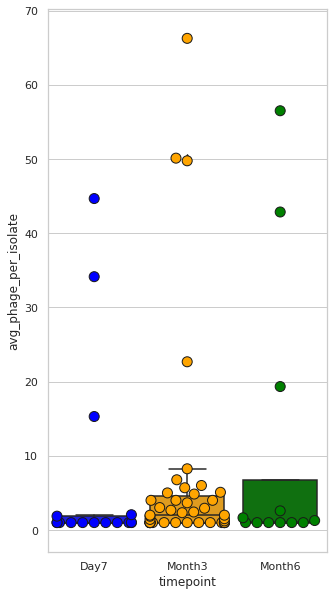

In [101]:
sns.set(rc={'figure.figsize':(5,10)})
sns.set_style(style="whitegrid")
x = sns.boxplot(data=pc_df, y='avg_phage_per_isolate', x='timepoint', 
                order=['Day7', 'Month3', 'Month6'], palette=['blue', 'orange', 'green'])
x = sns.swarmplot(data=pc_df, y='avg_phage_per_isolate', x='timepoint', 
                  order=['Day7', 'Month3', 'Month6'], palette=['blue', 'orange', 'green'], 
                  size=10, edgecolor='k', linewidth=1)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [102]:
M6 = set(pc_df[pc_df['timepoint'] == 'Month6'].group.values)
M3 = set(pc_df[pc_df['timepoint'] == 'Month3'].group.values)
D7 = set(pc_df[pc_df['timepoint'] == 'Day7'].group.values)

In [103]:
common = D7.intersection(M3, M6)

In [104]:
common

{'Bacillus ',
 'Cronobacter ',
 'Enterobacteriaceae',
 'Escherichia',
 'Klebsiella ',
 'Salmonella ',
 'Shigella ',
 'Stenotrophomonas '}

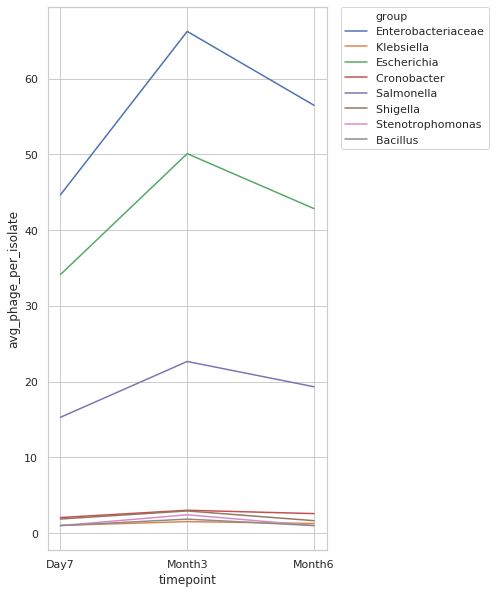

In [105]:
sns.set(rc={'figure.figsize':(5,10)})
sns.set_style(style="whitegrid")
x = sns.lineplot(data=pc_df[pc_df.group.isin(common)], y='avg_phage_per_isolate', x='timepoint', hue='group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [106]:
Mn6df = pc_df[pc_df['timepoint'] == 'Month6'].copy()
Mn3df = pc_df[pc_df['timepoint'] == 'Month3'].copy()
D7df = pc_df[pc_df['timepoint'] == 'Day7'].copy()

In [107]:
Mn6df['relative_abundance'] = Mn6df['num_phage_found']/Mn6df['num_phage_found'].sum()
Mn3df['relative_abundance'] = Mn3df['num_phage_found']/Mn3df['num_phage_found'].sum()
D7df['relative_abundance'] = D7df['num_phage_found']/D7df['num_phage_found'].sum()

In [108]:
combo_phage = pd.concat([D7df, Mn3df, Mn6df])
combo_phage

,timepoint,group,num_phage_found,num_isolates,avg_phage_per_isolate,relative_abundance
0,Day7,Enterobacteriaceae,25458,570,44.663158,0.451431
1,Day7,Klebsiella,576,561,1.026738,0.010214
2,Day7,Escherichia,19423,569,34.135325,0.344416
3,Day7,Cronobacter,1163,564,2.062057,0.020623
4,Day7,Salmonella,8687,568,15.294014,0.154041
5,Day7,Shigella,1059,567,1.867725,0.018779
6,Day7,Stenotrophomonas,13,13,1.000000,0.000231
7,Day7,Psychrobacter,2,2,1.000000,0.000035
8,Day7,Bacillus,2,2,1.000000,0.000035
9,Day7,Pseudomonas,3,3,1.000000,0.000053


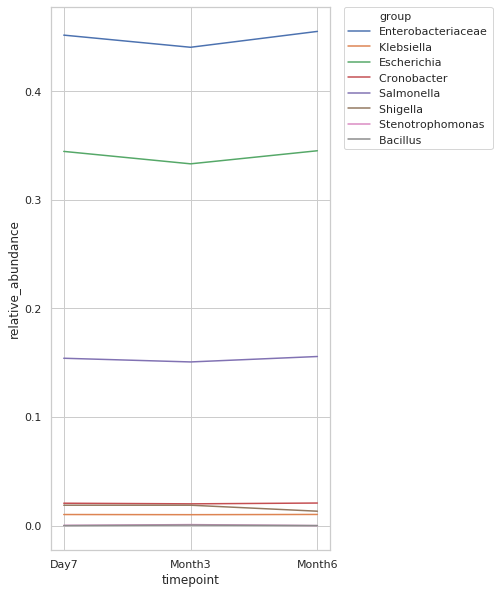

In [109]:
sns.set(rc={'figure.figsize':(5,10)})
sns.set_style(style="whitegrid")
x = sns.lineplot(data=combo_phage[combo_phage.group.isin(common)], y='relative_abundance', x='timepoint', hue='group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [110]:
#stacked barplot

ax = sns.histplot(
    combo_phage,
    x='timepoint',
    weights='relative_abundance',
    hue='group',
    multiple='stack',
    palette='coolwarm')
    # Add white borders to the bars.
    #edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    #shrink=0.8)

ax.set_title('Phage Relative Abundance by Timepoint')
# Remove 'Count' ylabel.
#ax.set_ylabel(None)

# WHY NO WORK????

AttributeError: module 'seaborn' has no attribute 'histplot'

In [111]:
common_phage = combo_phage[combo_phage.group.isin(common)]
common_phage.head()

,timepoint,group,num_phage_found,num_isolates,avg_phage_per_isolate,relative_abundance
0,Day7,Enterobacteriaceae,25458,570,44.663158,0.451431
1,Day7,Klebsiella,576,561,1.026738,0.010214
2,Day7,Escherichia,19423,569,34.135325,0.344416
3,Day7,Cronobacter,1163,564,2.062057,0.020623
4,Day7,Salmonella,8687,568,15.294014,0.154041


In [112]:
common_phage2 = common_phage[['timepoint', 'group', 'relative_abundance']].copy()
common_phage22 = common_phage2.pivot(index='timepoint', columns='group')['relative_abundance']
common_phage22

group,Bacillus,Cronobacter,Enterobacteriaceae,Escherichia,Klebsiella,Salmonella,Shigella,Stenotrophomonas
timepoint,,,,,,,,
Day7,0.000035,0.020623,0.451431,0.344416,0.010214,0.154041,0.018779,0.000231
Month3,0.000481,0.020047,0.440247,0.332975,0.010070,0.150642,0.018789,0.000944
Month6,0.000027,0.020781,0.454847,0.345011,0.010282,0.155641,0.013274,0.000027


In [113]:
common_phage222 = common_phage22.reindex(common_phage22.mean().sort_values().index, axis=1)
common_phage222

group,Bacillus,Stenotrophomonas,Klebsiella,Shigella,Cronobacter,Salmonella,Escherichia,Enterobacteriaceae
timepoint,,,,,,,,
Day7,0.000035,0.000231,0.010214,0.018779,0.020623,0.154041,0.344416,0.451431
Month3,0.000481,0.000944,0.010070,0.018789,0.020047,0.150642,0.332975,0.440247
Month6,0.000027,0.000027,0.010282,0.013274,0.020781,0.155641,0.345011,0.454847


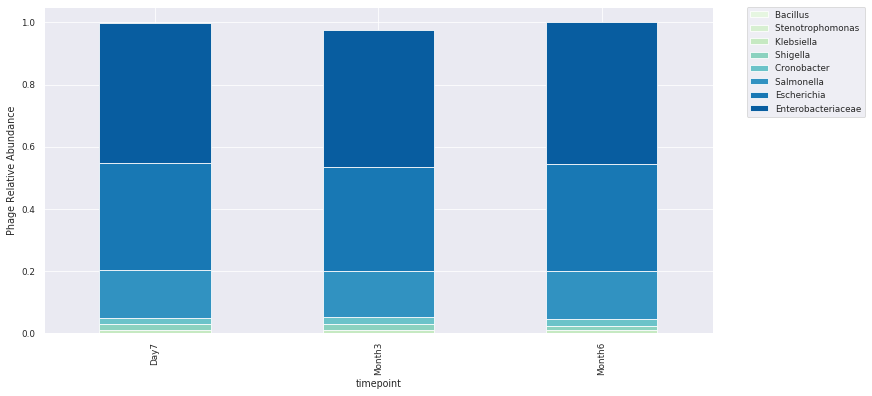

In [114]:
sns.set('paper')
common_phage222.plot(kind='bar', stacked=True,
          colormap=ListedColormap(sns.color_palette("GnBu", 10)), 
          figsize=(12,6))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylabel('Phage Relative Abundance')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('./common_phage_relabun_byhost.pdf', dpi=300, bbox_inches="tight")

In [115]:
common_phage3 = common_phage[['timepoint', 'group', 'avg_phage_per_isolate']].copy()
common_phage33 = common_phage3.pivot(index='timepoint', columns='group')['avg_phage_per_isolate']
common_phage33

group,Bacillus,Cronobacter,Enterobacteriaceae,Escherichia,Klebsiella,Salmonella,Shigella,Stenotrophomonas
timepoint,,,,,,,,
Day7,1.000000,2.062057,44.663158,34.135325,1.026738,15.294014,1.867725,1.000000
Month3,1.857143,3.025140,66.247911,50.105850,1.523810,22.668524,2.933526,2.428571
Month6,1.000000,2.581081,56.493243,42.851351,1.277027,19.331081,1.648649,1.000000


In [116]:
common_phage333 = common_phage33.reindex(common_phage33.mean().sort_values().index, axis=1)
common_phage333

group,Klebsiella,Bacillus,Stenotrophomonas,Shigella,Cronobacter,Salmonella,Escherichia,Enterobacteriaceae
timepoint,,,,,,,,
Day7,1.026738,1.000000,1.000000,1.867725,2.062057,15.294014,34.135325,44.663158
Month3,1.523810,1.857143,2.428571,2.933526,3.025140,22.668524,50.105850,66.247911
Month6,1.277027,1.000000,1.000000,1.648649,2.581081,19.331081,42.851351,56.493243


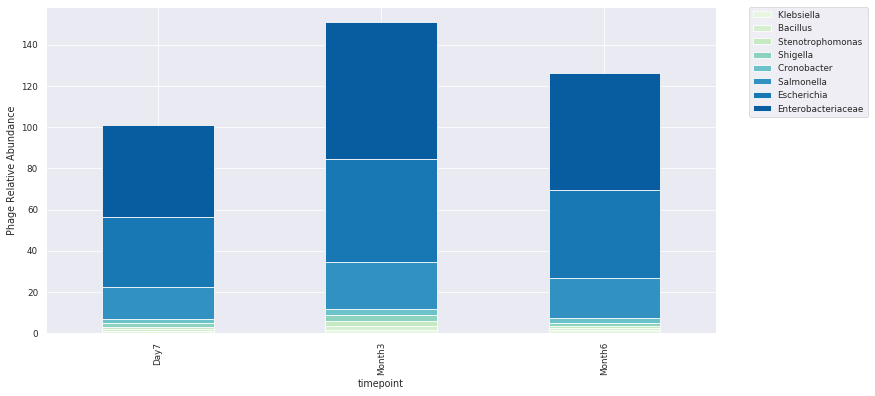

In [117]:
sns.set('paper')
common_phage333.plot(kind='bar', stacked=True,
          colormap=ListedColormap(sns.color_palette("GnBu", 10)), 
          figsize=(12,6))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylabel('Average Phage Per Isolate')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('./common_phage_AvgPerIsol_byhost.pdf', dpi=300, bbox_inches="tight")

### Statistics

In [118]:
stats_path = r'./*/dramv-distill/'
all_files2 = glob.glob(stats_path + "vMAG_stats.tsv")

In [119]:
li2 = []

In [120]:
for filenamez in all_files2:
    dstats = pd.read_csv(filenamez, sep='\t', header=0)
    dstats["identification"] = filenamez
    li2.append(dstats)

In [121]:
stats_combo = pd.concat(li2, axis=0, ignore_index=True, sort=False)
stats_combo.shape

(4065, 16)

In [122]:
stats_combo.head()

,Unnamed: 0,VIRSorter category,Circular,Prophage,Gene count,Strand switches,potential AMG count,Transposase present,Possible Non-Viral Contig,Viral genes with host benefits,Viral genes with unknown function,Viral genes with viral benefits,Viral structure genes,Viral hypothetical genes,Viral replication genes,identification
0,2__0_partial_1-cat_1,1,False,False,57,7,0,False,0.035088,5.0,18.0,9.0,7.0,16.0,2.0,./27N_Day7_9_S989_L001_noref/dramv-distill/vMA...
1,3__0_partial_1-cat_1,1,False,False,18,1,0,False,0.055556,3.0,0.0,0.0,2.0,13.0,0.0,./27N_Day7_9_S989_L001_noref/dramv-distill/vMA...
2,7__0_partial_1-cat_1,1,False,False,46,8,0,False,0.086957,5.0,15.0,9.0,10.0,4.0,3.0,./27N_Day7_9_S989_L001_noref/dramv-distill/vMA...
3,2__0_partial_1-cat_1,1,False,False,57,7,0,False,0.035088,4.0,18.0,1.0,7.0,16.0,11.0,./28R_Month6_12_S692_L001_noref/dramv-distill/...
4,3__0_partial_1-cat_1,1,False,False,17,2,0,False,0.058824,1.0,0.0,0.0,2.0,12.0,2.0,./28R_Month6_12_S692_L001_noref/dramv-distill/...


In [123]:
stats_combo["sample"] = stats_combo["identification"].str.split("/").str[1]
stats_combo.head()

,Unnamed: 0,VIRSorter category,Circular,Prophage,Gene count,Strand switches,potential AMG count,Transposase present,Possible Non-Viral Contig,Viral genes with host benefits,Viral genes with unknown function,Viral genes with viral benefits,Viral structure genes,Viral hypothetical genes,Viral replication genes,identification,sample
0,2__0_partial_1-cat_1,1,False,False,57,7,0,False,0.035088,5.0,18.0,9.0,7.0,16.0,2.0,./27N_Day7_9_S989_L001_noref/dramv-distill/vMA...,27N_Day7_9_S989_L001_noref
1,3__0_partial_1-cat_1,1,False,False,18,1,0,False,0.055556,3.0,0.0,0.0,2.0,13.0,0.0,./27N_Day7_9_S989_L001_noref/dramv-distill/vMA...,27N_Day7_9_S989_L001_noref
2,7__0_partial_1-cat_1,1,False,False,46,8,0,False,0.086957,5.0,15.0,9.0,10.0,4.0,3.0,./27N_Day7_9_S989_L001_noref/dramv-distill/vMA...,27N_Day7_9_S989_L001_noref
3,2__0_partial_1-cat_1,1,False,False,57,7,0,False,0.035088,4.0,18.0,1.0,7.0,16.0,11.0,./28R_Month6_12_S692_L001_noref/dramv-distill/...,28R_Month6_12_S692_L001_noref
4,3__0_partial_1-cat_1,1,False,False,17,2,0,False,0.058824,1.0,0.0,0.0,2.0,12.0,2.0,./28R_Month6_12_S692_L001_noref/dramv-distill/...,28R_Month6_12_S692_L001_noref


In [124]:
new2 = stats_combo["sample"].str.split("_", n=3, expand=True)
new2['id'] = new2[0].astype(str)+"_"+new2[1].astype(str)+"_"+new2[2].astype(str)
new2.head()

,0,1,2,3,id
0,27N,Day7,9,S989_L001_noref,27N_Day7_9
1,27N,Day7,9,S989_L001_noref,27N_Day7_9
2,27N,Day7,9,S989_L001_noref,27N_Day7_9
3,28R,Month6,12,S692_L001_noref,28R_Month6_12
4,28R,Month6,12,S692_L001_noref,28R_Month6_12


In [125]:
stats_combo['simple_id'] = new2['id']

In [126]:
allinfo2 = pd.merge(stats_combo, metadata, left_on='simple_id', right_on='dramv_id')
allinfo2.head()

,Unnamed: 0,VIRSorter category,Circular,Prophage,Gene count,Strand switches,potential AMG count,Transposase present,Possible Non-Viral Contig,Viral genes with host benefits,...,mouse_id,mouse_strain,qiita_study_id,sample_type,scientific_name,sex,taxon_id,tube_id,zarrinparlab_quant_ng_ul,dramv_id
0,2__0_partial_1-cat_1,1,False,False,57,7,0,False,0.035088,5.0,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,27N_Day7_9
1,3__0_partial_1-cat_1,1,False,False,18,1,0,False,0.055556,3.0,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,27N_Day7_9
2,7__0_partial_1-cat_1,1,False,False,46,8,0,False,0.086957,5.0,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,27N_Day7_9
3,2__0_partial_1-cat_1,1,False,False,57,7,0,False,0.035088,4.0,...,28R,C57Bl/6,12986,feces,mouse gut metagenome,female,410661,28R-12_Month6,57.7,28R_Month6_12
4,3__0_partial_1-cat_1,1,False,False,17,2,0,False,0.058824,1.0,...,28R,C57Bl/6,12986,feces,mouse gut metagenome,female,410661,28R-12_Month6,57.7,28R_Month6_12


In [127]:
allinfo2.set_index("sample", inplace=True)
allinfo2.head()

,Unnamed: 0,VIRSorter category,Circular,Prophage,Gene count,Strand switches,potential AMG count,Transposase present,Possible Non-Viral Contig,Viral genes with host benefits,...,mouse_id,mouse_strain,qiita_study_id,sample_type,scientific_name,sex,taxon_id,tube_id,zarrinparlab_quant_ng_ul,dramv_id
sample,,,,,,,,,,,,,,,,,,,,,
27N_Day7_9_S989_L001_noref,2__0_partial_1-cat_1,1,False,False,57,7,0,False,0.035088,5.0,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,27N_Day7_9
27N_Day7_9_S989_L001_noref,3__0_partial_1-cat_1,1,False,False,18,1,0,False,0.055556,3.0,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,27N_Day7_9
27N_Day7_9_S989_L001_noref,7__0_partial_1-cat_1,1,False,False,46,8,0,False,0.086957,5.0,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,27N_Day7_9
28R_Month6_12_S692_L001_noref,2__0_partial_1-cat_1,1,False,False,57,7,0,False,0.035088,4.0,...,28R,C57Bl/6,12986,feces,mouse gut metagenome,female,410661,28R-12_Month6,57.7,28R_Month6_12
28R_Month6_12_S692_L001_noref,3__0_partial_1-cat_1,1,False,False,17,2,0,False,0.058824,1.0,...,28R,C57Bl/6,12986,feces,mouse gut metagenome,female,410661,28R-12_Month6,57.7,28R_Month6_12


In [128]:
allinfo2.rename(columns={"Unnamed: 0": "phage_id"}, inplace=True)
allinfo2.head()

,phage_id,VIRSorter category,Circular,Prophage,Gene count,Strand switches,potential AMG count,Transposase present,Possible Non-Viral Contig,Viral genes with host benefits,...,mouse_id,mouse_strain,qiita_study_id,sample_type,scientific_name,sex,taxon_id,tube_id,zarrinparlab_quant_ng_ul,dramv_id
sample,,,,,,,,,,,,,,,,,,,,,
27N_Day7_9_S989_L001_noref,2__0_partial_1-cat_1,1,False,False,57,7,0,False,0.035088,5.0,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,27N_Day7_9
27N_Day7_9_S989_L001_noref,3__0_partial_1-cat_1,1,False,False,18,1,0,False,0.055556,3.0,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,27N_Day7_9
27N_Day7_9_S989_L001_noref,7__0_partial_1-cat_1,1,False,False,46,8,0,False,0.086957,5.0,...,27N,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,27N-9_Day7,159.7,27N_Day7_9
28R_Month6_12_S692_L001_noref,2__0_partial_1-cat_1,1,False,False,57,7,0,False,0.035088,4.0,...,28R,C57Bl/6,12986,feces,mouse gut metagenome,female,410661,28R-12_Month6,57.7,28R_Month6_12
28R_Month6_12_S692_L001_noref,3__0_partial_1-cat_1,1,False,False,17,2,0,False,0.058824,1.0,...,28R,C57Bl/6,12986,feces,mouse gut metagenome,female,410661,28R-12_Month6,57.7,28R_Month6_12


In [129]:
allinfo2.to_csv("./dramv_phage_stats_with_metadata.csv")

#### graphs

In [130]:
summary_info = allinfo2[["Gene count", "Viral genes with host benefits", "dramv_id"]].copy()

In [131]:
summary_info2 = summary_info.groupby(by="dramv_id").sum()
summary_info2.head()

,Gene count,Viral genes with host benefits
dramv_id,,
23B_Day7_1,121,43.0
23B_Day7_10,121,13.0
23B_Day7_11,120,18.0
23B_Day7_12,121,18.0
23B_Day7_13,164,7.0


In [132]:
summary_info2['percent beneficial'] = (summary_info2["Viral genes with host benefits"].astype(float)/summary_info2["Gene count"].astype(float))*100

In [133]:
summary_info2.head()

,Gene count,Viral genes with host benefits,percent beneficial
dramv_id,,,
23B_Day7_1,121,43.0,35.537190
23B_Day7_10,121,13.0,10.743802
23B_Day7_11,120,18.0,15.000000
23B_Day7_12,121,18.0,14.876033
23B_Day7_13,164,7.0,4.268293


In [134]:
summary_info3 = pd.merge(summary_info2, metadata, left_index=True, right_on='dramv_id')
summary_info3.head()

,Gene count,Viral genes with host benefits,percent beneficial,box_id,cage_id,collection_timepoint,collection_timestamp,date_colonized,diet,elevation,...,mouse_id,mouse_strain,qiita_study_id,sample_type,scientific_name,sex,taxon_id,tube_id,zarrinparlab_quant_ng_ul,dramv_id
sample_name,,,,,,,,,,,,,,,,,,,,,
12986.23B.Day7.1,121,43.0,35.537190,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193,...,23B,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,23B-1_Day7,78.0,23B_Day7_1
12986.23B.Day7.10,121,13.0,10.743802,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193,...,23B,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,23B-10_Day7,53.3,23B_Day7_10
12986.23B.Day7.11,120,18.0,15.000000,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193,...,23B,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,23B-11_Day7,80.6,23B_Day7_11
12986.23B.Day7.12,121,18.0,14.876033,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193,...,23B,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,23B-12_Day7,49.1,23B_Day7_12
12986.23B.Day7.13,164,7.0,4.268293,14.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193,...,23B,C57Bl/6,12986,feces,mouse gut metagenome,male,410661,23B-13_Day7,48.6,23B_Day7_13


Total phage gene counts

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Day7 v.s. Month3: Mann-Whitney-Wilcoxon test two-sided P_val=3.713e-03 U_stat=9.786e+04
Month3 v.s. Month6: Mann-Whitney-Wilcoxon test two-sided P_val=6.290e-07 U_stat=7.392e+04
Day7 v.s. Month6: Mann-Whitney-Wilcoxon test two-sided P_val=3.155e-04 U_stat=1.031e+05


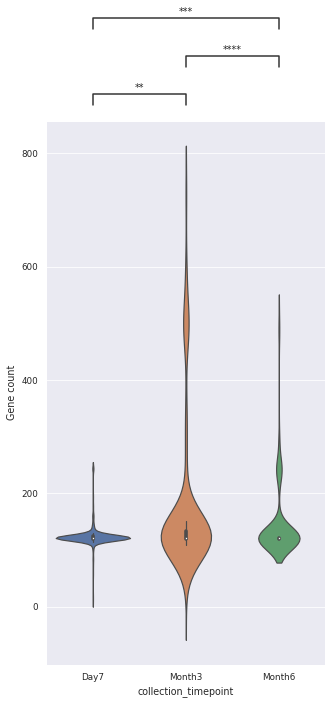

In [135]:
ax = sns.violinplot(data=summary_info3, x='collection_timepoint', y='Gene count', 
              scale='count')
ax, test_results = add_stat_annotation(ax, data=summary_info3, x='collection_timepoint', y='Gene count',
                                   box_pairs=[("Day7", "Month3"), ("Day7", "Month6"), ("Month3", "Month6")],
                                   test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

In [136]:
summary_info3.groupby(by="collection_timepoint")["Gene count"].mean()

collection_timepoint
Day7      123.752632
Month3    180.706494
Month6    145.239748
Name: Gene count, dtype: float64

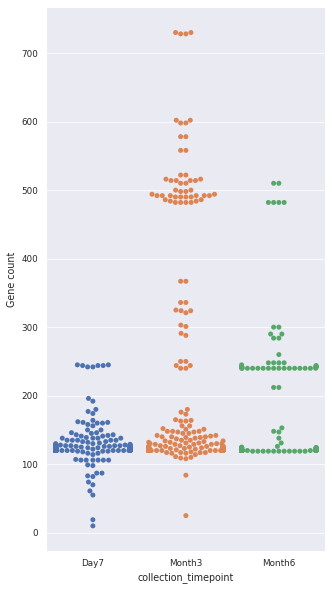

In [137]:
sns.swarmplot(data=summary_info3, x='collection_timepoint', y='Gene count')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Month3_male v.s. Month3_female: Mann-Whitney-Wilcoxon test two-sided P_val=2.147e-02 U_stat=1.973e+04
Day7_male v.s. Day7_female: Mann-Whitney-Wilcoxon test two-sided P_val=4.587e-01 U_stat=4.057e+04
Month6_male v.s. Month6_female: Mann-Whitney-Wilcoxon test two-sided P_val=5.490e-01 U_stat=1.161e+04


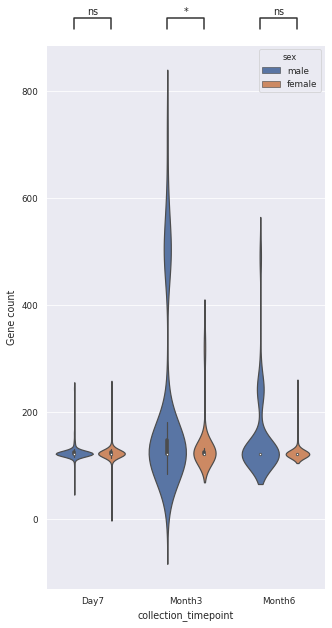

In [138]:
box_pairs = [((tp, 'male'), (tp, 'female')) for tp in summary_info3['collection_timepoint'].unique()]
ax = sns.violinplot(data=summary_info3, x='collection_timepoint', y='Gene count', 
               hue="sex", scale='count')
ax, test_results = add_stat_annotation(ax, data=summary_info3, x='collection_timepoint', y='Gene count',
                                   hue='sex', box_pairs=box_pairs,
                                   test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

In [139]:
summary_info3.groupby(by=["collection_timepoint", "sex"])["Gene count"].mean()

collection_timepoint  sex   
Day7                  female    122.885593
                      male      124.388554
Month3                female    142.930556
                      male      203.278008
Month6                female    124.764706
                      male      152.872340
Name: Gene count, dtype: float64

Percent beneficial

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Day7 v.s. Month3: Mann-Whitney-Wilcoxon test two-sided P_val=2.134e-01 U_stat=1.149e+05
Month3 v.s. Month6: Mann-Whitney-Wilcoxon test two-sided P_val=7.245e-01 U_stat=6.008e+04
Day7 v.s. Month6: Mann-Whitney-Wilcoxon test two-sided P_val=5.527e-01 U_stat=9.251e+04


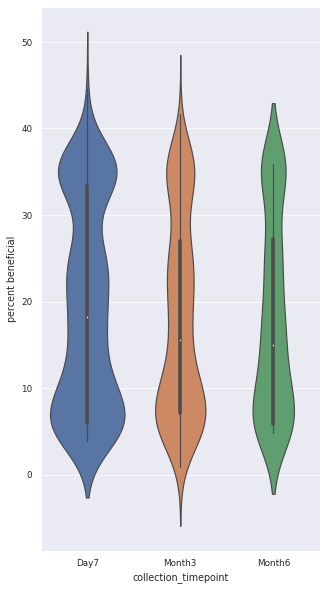

In [140]:
sns.violinplot(data=summary_info3, x='collection_timepoint', y='percent beneficial', 
              scale='count')
ax, test_results = add_stat_annotation(ax, data=summary_info3, x='collection_timepoint', y='percent beneficial',
                                   box_pairs=[("Day7", "Month3"), ("Day7", "Month6"), ("Month3", "Month6")],
                                   test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

In [141]:
summary_info3.groupby(by="collection_timepoint")["Gene count", "Viral genes with host benefits", 
                                                 "percent beneficial"].mean()

,Gene count,Viral genes with host benefits,percent beneficial
collection_timepoint,,,
Day7,123.752632,23.977193,19.414016
Month3,180.706494,31.906494,18.054769
Month6,145.239748,26.750789,18.135643


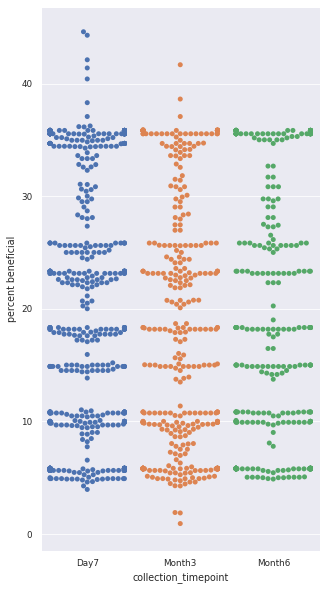

In [142]:
sns.swarmplot(data=summary_info3, x='collection_timepoint', y='percent beneficial')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Month3_male v.s. Month3_female: Mann-Whitney-Wilcoxon test two-sided P_val=2.147e-02 U_stat=1.973e+04
Day7_male v.s. Day7_female: Mann-Whitney-Wilcoxon test two-sided P_val=4.587e-01 U_stat=4.057e+04
Month6_male v.s. Month6_female: Mann-Whitney-Wilcoxon test two-sided P_val=5.490e-01 U_stat=1.161e+04


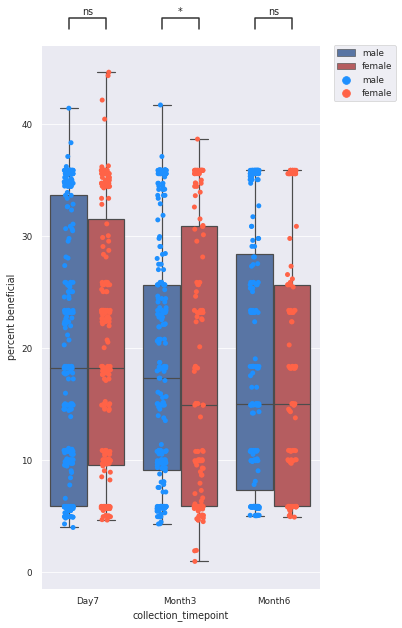

In [143]:
box_pairs = [((tp, 'male'), (tp, 'female')) for tp in summary_info3['collection_timepoint'].unique()]
ax = sns.boxplot(data=summary_info3, x='collection_timepoint', y='percent beneficial', 
            hue="sex", palette=['b', 'r'])
ax = sns.stripplot(data=summary_info3, x='collection_timepoint', y='percent beneficial', 
            hue="sex", palette=['dodgerblue', 'tomato'], dodge=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax, test_results = add_stat_annotation(ax, data=summary_info3, x='collection_timepoint', y='Gene count',
                                   hue='sex', box_pairs=box_pairs,
                                   test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

In [144]:
summary_info3.groupby(by=["collection_timepoint", "sex"])["Gene count", "Viral genes with host benefits", 
                                                 "percent beneficial"].mean()

Gene count  Viral genes with host benefits  \
collection_timepoint sex                                                  
Day7                 female  122.885593                       24.021186   
                     male    124.388554                       23.939759   
Month3               female  142.930556                       23.930556   
                     male    203.278008                       36.672199   
Month6               female  124.764706                       22.243697   
                     male    152.872340                       28.489362   

                             percent beneficial  
collection_timepoint sex                         
Day7                 female           19.637104  
                     male             19.247030  
Month3               female           17.947622  
                     male             18.118791  
Month6               female           17.714856  
                     male             18.359606